# Presentation projet

presenter le dataset, l'objectif de cette etude, les etape, et resultat attendu, rappel formule, et mettre liens pour chaque section

La base de données contient des variables relatives aux diagnostics de performance énergétique (DPE) pour des logements et bâtiments. Parmi les informations, on retrouve des éléments liés à l’identification et à la géolocalisation des logements, tels que le numéro du DPE, les dates de réception et d’établissement du DPE et les coordonnées cartographiques.

Concernant les caractéristiques techniques des bâtiments, plusieurs variables sont présentes, telles que l'année de construction, le type de bâtiment, le type d'installation de chauffage et d'eau chaude sanitaire (ECS), ainsi que des détails sur l'isolation et les déperditions thermiques (murs, fenêtres, portes, etc.). Les informations sur les consommations énergétiques, les émissions de gaz à effet de serre (GES) et les coûts associés aux différents usages (chauffage, ECS, éclairage, etc.) sont également incluses.

Cette base contient également des données sur les équipements de production d’énergie renouvelable, notamment les installations photovoltaïques, ainsi que des informations détaillées sur les systèmes de ventilation et de refroidissement. 

Avec cette richesse de données, cette base permet une analyse approfondie de la performance énergétique des bâtiments, en considérant à la fois les aspects thermiques, les systèmes énergétiques en place et les caractéristiques des logements.

L'objectif de cette analyse est de détecter toutes les corrélations présentes dans la base de données, de développer des modèles de régression pour ces corrélations et de les enregistrer pour une utilisation future.

Ensuite, une analyse en composantes principales (ACP) sera réalisée, à la fois sur les données réduites et sur l'ensemble des données complètes. Cette double approche permettra de comparer l'impact de la réduction de dimension sur les résultats de l'ACP et d'évaluer si la régression effectuée a contribué à améliorer la compréhension des structures sous-jacentes des données. Cela nous permettra de déterminer si la réduction des dimensions par la régression était réellement utile ou si l'utilisation des données complètes offre de meilleures performances dans l'analyse.

Puis, tous à la fin, nous chercherons à mettre en place un clustering de nos bâtiments pour voir s'ils suivent une structure particulière et chercher à la comprendre

# Import package

Ici, nous importons les bibliothèques suivantes afin de garantir le bon fonctionnement du programme :

In [82]:
import pandas as pd  # traitement des données (manipulation de data frame)
import numpy as np   # calcul matriciel
from scipy.stats import t, f # pour obtenir le T de student a alpha pourcent pour n degré de liberté

import matplotlib.pyplot as plt # graphique
import seaborn as sns           # graphique

from tqdm import tqdm  # affiché bar d chargement 

from sklearn.ensemble import RandomForestClassifier  # pour classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split # pour classification
from sklearn.metrics import classification_report, accuracy_score # pour classification
from sklearn.tree import plot_tree

import warnings # masquer les warnings
warnings.filterwarnings("ignore")

# Read data

Nous ouvrons notre fichier avec pendas et creons une copie afin de ne pas modifier l'originale.

In [2]:
data = pd.read_csv("DATA.csv", low_memory=False)
df = data.copy()
df.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Type_générateur_froid,Surface_climatisée,Type_énergie_climatisation,Catégorie_ENR,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module
0,2463E4534696Y,2024-12-22,2024-12-19,2024-12-19,DPE 3CL 2021 méthode logement,NaN,2034-12-18,2.4,NaN,0.0,...,NaN,NaN,NaN,chauffage au bois,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
1,2456E4535037U,2024-12-22,2024-12-19,2024-12-19,DPE 3CL 2021 méthode logement,NaN,2034-12-18,2.4,NaN,0.0,...,NaN,NaN,NaN,chauffe-eau thermodynamique,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
2,2462E4538696T,2024-12-23,2024-12-22,2024-12-22,DPE 3CL 2021 méthode logement,NaN,2034-12-21,2.4,2462E4538421E,0.0,...,NaN,NaN,NaN,panneaux solaires thermiques,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
3,2433E4552306C,2024-12-23,2024-12-19,2024-12-19,DPE 3CL 2021 méthode logement,NaN,2034-12-18,2.4,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
4,2447E4544281Z,2024-12-23,2024-12-22,2024-12-22,DPE 3CL 2021 méthode logement,NaN,2034-12-21,2.4,NaN,NaN,...,PAC air/air installée entre 2008 et 2014,60.0,Électricité,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,9113.6,21.6,18.0


In [3]:
df.shape

(8718, 242)

Nous affichons nos données, nous constatons qu'elle est composée de plus de 8000 lignes et de 240 colonnes

# Nettoyage des données

## nettoyage global

In [4]:
# taille du data set 
df.shape

(8718, 242)

In [5]:
# nombre de colonne par type de données 
df.dtypes.value_counts()

float64    153
object      88
int64        1
Name: count, dtype: int64

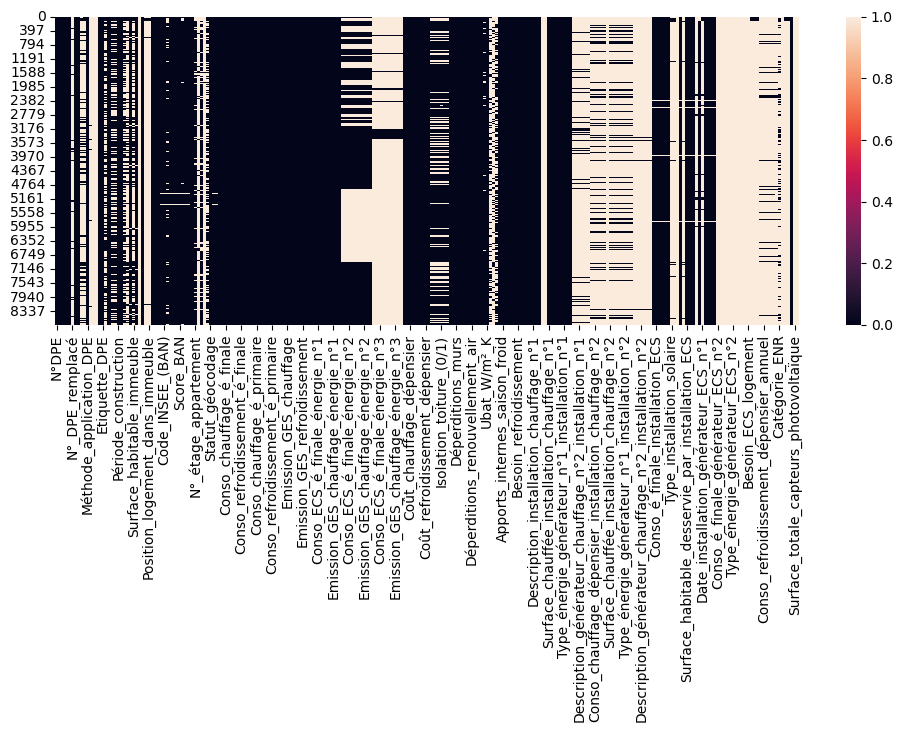

In [6]:
# visualisation de notre dataset pour identifier les valeur vide
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull())
plt.show()

L'analyse de la base de données montre qu'elle contient 8 718 lignes et 242 colonnes. En examinant la répartition des types de données :

* 153 colonnes sont de type float64,

* 88 colonnes sont de type object,

* 1 colonne est de type int64.

La visualisation avec une heatmap des valeurs manquantes révèle que de nombreuses colonnes sont quasi totalement vides (zones claires sur la heatmap). 
Cela signifie que plusieurs variables contiennent un pourcentage élevé de valeurs manquantes.

L'étape suivante consistera à quantifier la proportion de valeurs manquantes dans chaque colonne. Cela nous aidera à décider si nous devons :

* Supprimer certaines colonnes si elles contiennent trop de valeurs manquantes,

* Remplacer les valeurs manquantes par des statistiques comme la moyenne, la médiane ou une valeur par défaut, selon la nature des données.

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = False).round(2).value_counts()

0.00    127
1.00     27
0.80     13
0.95     11
0.38     10
0.99      7
0.26      6
0.90      6
0.92      5
0.94      3
0.97      3
0.03      2
0.98      2
0.31      2
0.77      2
0.05      1
0.11      1
0.02      1
0.12      1
0.16      1
0.01      1
0.54      1
0.37      1
0.40      1
0.47      1
0.72      1
0.73      1
0.74      1
0.83      1
0.93      1
0.60      1
Name: count, dtype: int64

Nous avons identifié environ 30 variables entièrement vides, que nous allons supprimer.

De plus, plusieurs variables contiennent plus de 80 % de valeurs manquantes. 
Même en effectuant des imputations, leur faible quantité de données exploitables risquerait de biaiser notre modèle lors du développement.

Par conséquent, nous allons supprimer toutes les variables ayant plus de 80 % de valeurs manquantes (soit 4/5 des données absentes). 
Ensuite, nous chercherons à compléter les autres variables en utilisant des techniques adaptées, comme l’imputation par la moyenne, la médiane ou d'autres méthodes pertinentes.

In [8]:
df = df[df.columns[(df.isna().sum() / df.shape[0]).round(2) < 0.8]]
df.shape

(8718, 163)

En supprimant les variables ayant plus de 80 % de valeurs manquantes, il nous reste 163 variables.

Cependant, environ 50 variables contiennent encore des valeurs manquantes. 
Nous allons donc visualiser le DataFrame afin d’analyser ces données et déterminer la meilleure approche pour les traiter.

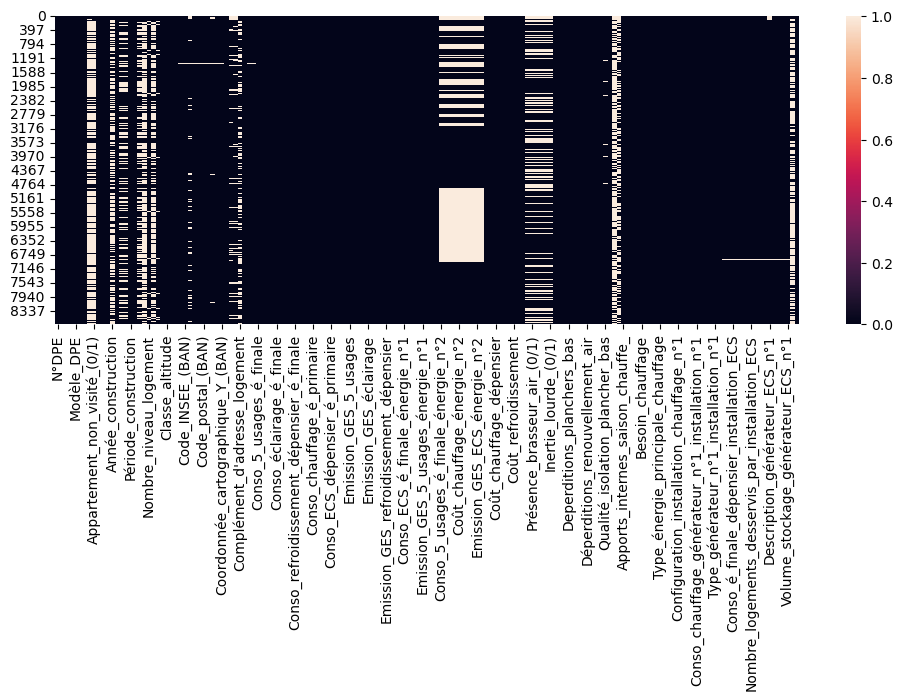

In [9]:
# visualisation de notre dataset pour identifier les valeur vide
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull())
plt.show()

Nous allons commencer par traiter les variables ayant le moins de valeurs manquantes, afin de limiter la perte d’information et préserver la structure des données.

* Pour les variables quantitatives, nous remplacerons les valeurs manquantes par la médiane. Contrairement à la moyenne, la médiane est moins sensible aux valeurs extrêmes (outliers) et offre une estimation plus robuste des tendances centrales.

* Pour les variables qualitatives, nous utiliserons le mode (valeur la plus fréquente). Cela permet de conserver la cohérence des catégories même si cela introduire un biais dans la distribution des données.

In [10]:
# selection des données dans des dataframe different en fonction du type
df_quanti = df.select_dtypes(["float", "int"])
df_quali = df.select_dtypes("object")

In [11]:
print(df_quanti.shape)
print(df_quali.shape)

(8718, 106)
(8718, 57)


Ils nous reste 106 variable numérique et 57 qualitative

## traitement de df_quanti 

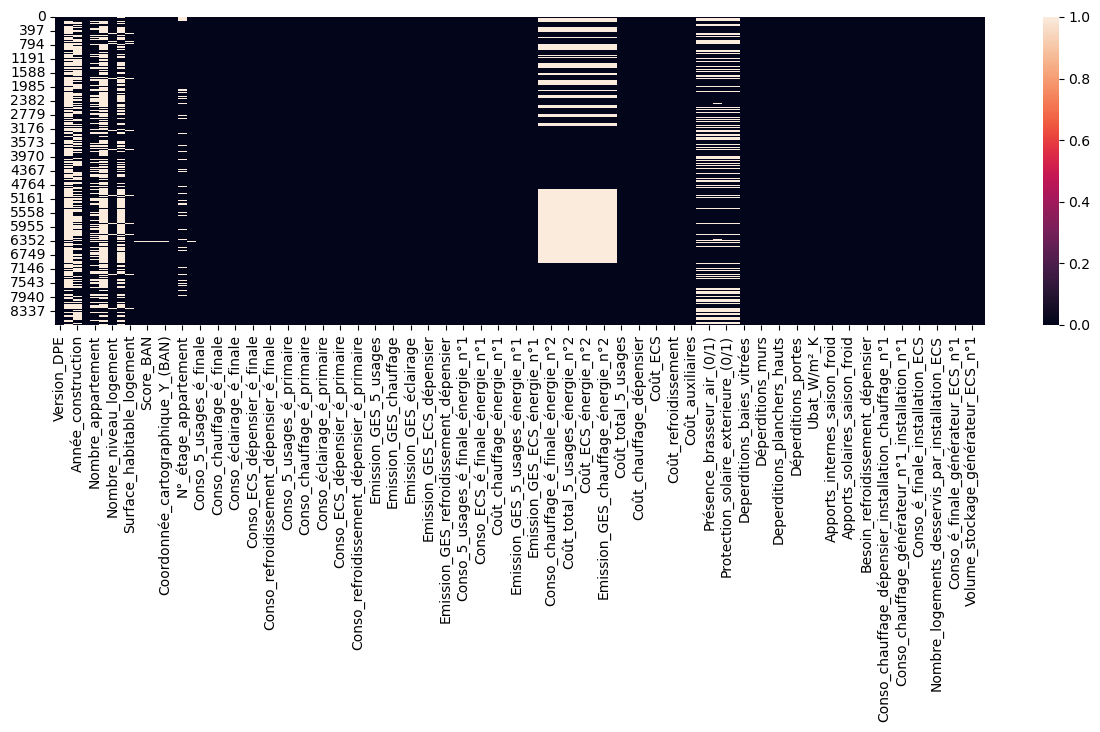

In [12]:
# visualisation de notre dataset pour identifier les valeur vide
plt.figure(figsize=(15, 4))
sns.heatmap(df_quanti.isnull())
plt.show()

In [13]:
# nombre de colonne vide par pourcentage
(df_quanti.isna().sum()/df.shape[0]).round(2).value_counts().sort_index()

0.00    84
0.03     2
0.11     1
0.26     5
0.37     1
0.38     9
0.54     1
0.60     1
0.74     1
0.77     1
Name: count, dtype: int64

Nous constatons à cette étape que la majorité des colonnes sont bien remplies, sans valeurs manquantes. 
Seules quelques variables présentent des lacunes, notamment celle lier au braseur d'air et de présence de panneau solaire ou même les coordonnées géographiques. 
Nous allons désormais examiner en détail ces valeurs manquantes afin de déterminer la meilleure stratégie de traitement : suppression ou imputation, selon le contexte et l’importance des variables concernées.

In [14]:
pd.set_option('display.max_columns', None)
df_quanti[df_quanti.columns[(df_quanti.isna().sum() / df_quanti.shape[0]) > 0]].describe()

,Appartement_non_visité_(0/1),Année_construction,Nombre_appartement,Nombre_niveau_immeuble,Nombre_niveau_logement,Surface_habitable_immeuble,Surface_habitable_logement,Code_postal_(BAN),Score_BAN,Coordonnée_cartographique_X_(BAN),Coordonnée_cartographique_Y_(BAN),N°_étage_appartement,N°_région_(BAN),Conso_5_usages_é_finale_énergie_n°2,Conso_chauffage_é_finale_énergie_n°2,Conso_ECS_é_finale_énergie_n°2,Coût_total_5_usages_énergie_n°2,Coût_chauffage_énergie_n°2,Coût_ECS_énergie_n°2,Emission_GES_5_usages_énergie_n°2,Emission_GES_chauffage_énergie_n°2,Emission_GES_ECS_énergie_n°2,Logement_traversant_(0/1),Présence_brasseur_air_(0/1),Isolation_toiture_(0/1),Protection_solaire_exterieure_(0/1),Inertie_lourde_(0/1),Conso_é_finale_installation_ECS,Conso_é_finale_dépensier_installation_ECS,Nombre_logements_desservis_par_installation_ECS,Surface_habitable_desservie_par_installation_ECS,Conso_é_finale_générateur_ECS_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Volume_stockage_générateur_ECS_n°1
count,2047.000000,3968.000000,5458.000000,2297.000000,8458.000000,3495.000000,8458.000000,8678.000000,8678.000000,8.678000e+03,8.678000e+03,7722.000000,8677.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,6465.000000,6465.000000,6427.000000,6465.000000,6465.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000,8703.000000
mean,0.766976,1970.808468,21.607365,5.138006,1.324308,3157.566180,70.094159,55318.151648,0.671406,6.616685e+05,6.690632e+06,0.132349,47.312666,2189.234298,999.430371,507.576139,409.599982,99.723216,108.061110,178.300738,72.179569,61.911912,0.635112,0.055684,0.554847,0.565971,0.303016,13017.508779,18070.840285,1.155406,471.353189,13017.508779,18070.840250,140.149684
std,0.422861,38.432864,39.822972,2.655221,0.747502,6136.264916,41.635554,26140.547889,0.168457,1.966700e+05,2.449073e+05,0.700504,28.168557,6442.821612,4016.860677,4107.130630,1285.482763,570.771693,810.107604,1064.626626,643.091729,787.872526,0.481436,0.229329,0.497021,0.495667,0.459598,38403.650537,53953.716023,3.701106,1033.483054,38403.650537,53953.716033,262.259565
min,0.000000,1600.000000,1.000000,1.000000,1.000000,1.000000,8.900000,1000.000000,0.180000,1.265442e+05,6.103259e+06,-1.000000,6.000000,39.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.600000,110.900000,1.000000,8.900000,78.600000,110.900000,0.000000
25%,1.000000,1954.000000,1.000000,3.000000,1.000000,906.800000,43.000000,33820.000000,0.550000,5.354885e+05,6.496901e+06,0.000000,27.000000,413.800000,0.000000,0.000000,124.300000,0.000000,0.000000,25.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1506.800000,1967.950000,1.000000,51.700000,1506.800000,1967.950000,0.000000
50%,1.000000,1973.000000,1.000000,5.000000,1.000000,1991.000000,64.000000,59243.000000,0.650000,6.523662e+05,6.757071e+06,0.000000,44.000000,675.900000,0.000000,0.000000,184.800000,0.000000,0.000000,42.100000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1853.400000,2412.200000,1.000000,81.000000,1853.400000,2412.200000,80.000000
75%,1.000000,1998.000000,29.000000,5.000000,1.000000,3391.000000,86.375000,76120.000000,0.760000,8.207868e+05,6.866527e+06,0.000000,76.000000,1973.200000,0.000000,0.000000,343.900000,0.000000,0.000000,116.050000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2303.900000,2979.150000,1.000000,174.400000,2303.900000,2979.150000,200.000000
max,1.000000,2024.000000,1490.000000,13.000000,17.000000,148647.000000,618.000000,97640.000000,0.990000,1.240072e+06,8.579820e+06,13.000000,94.000000,233406.500000,105062.500000,233406.500000,38535.600000,20155.300000,35869.200000,52983.300000,23849.200000,52983.300000,1.000000,1.000000,1.000000,1.000000,1.000000,317089.400000,433792.000000,316.000000,5885.000000,317089.400000,433792.000000,5000.000000


Nous allons supprimer les colonnes suivantes qui ne vont pas nous servir : 
* Coordonnée_cartographique_X_(BAN) : cordonnée geographique
* Coordonnée_cartographique_Y_(BAN) : cordonnée geographique
* Score_BAN	: Score de correspondance entre l’adresse fournie et celle trouvée dans la BAN
* Code_postal_(BAN)	: indiquenle code de la ville dans BAN
* N°_région_(BAN) : numéro de la region dans BAN

nb : BAN (Base adresse nationale)

Les autres variables contenant des valeurs manquantes seront imputées à l’aide de la médiane. 
Ce choix se justifie par le fait que la médiane est moins sensible aux valeurs aberrantes que la moyenne. 
En effet, comme nousle voyons dans le resumé statistique, la moyenne est souvent nettement plus élevée que la médiane pour de nombreuses variables, ce qui indique la présence outlier. 
Utiliser la médiane permet donc de garantir une imputation plus robuste et représentative de la tendance réelle des données.

In [15]:
# suppression des colonne inutile reperer
df_quanti = df_quanti.drop(["Coordonnée_cartographique_X_(BAN)", "Coordonnée_cartographique_Y_(BAN)", "Score_BAN", "Code_postal_(BAN)", "N°_région_(BAN)"], axis=1)

In [16]:
#imputation des valeurs par la mediane
df_quanti = df_quanti.apply(lambda col: col.fillna(col.median()), axis=0) 

In [17]:
df_quanti.describe()

,Version_DPE,Appartement_non_visité_(0/1),Année_construction,Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_immeuble,Nombre_niveau_logement,Surface_habitable_immeuble,Surface_habitable_logement,Code_postal_(brut),N°_étage_appartement,Conso_5_usages_é_finale,Conso_5_usages/m²_é_finale,Conso_chauffage_é_finale,Conso_chauffage_dépensier_é_finale,Conso_éclairage_é_finale,Conso_ECS_é_finale,Conso_ECS_dépensier_é_finale,Conso_refroidissement_é_finale,Conso_refroidissement_dépensier_é_finale,Conso_auxiliaires_é_finale,Conso_5_usages_é_primaire,Conso_5_usages_par_m²_é_primaire,Conso_chauffage_é_primaire,Conso_chauffage_dépensier_é_primaire,Conso_éclairage_é_primaire,Conso_ECS_é_primaire,Conso_ECS_dépensier_é_primaire,Conso_refroidissement_é_primaire,Conso_refroidissement_dépensier_é_primaire,Conso_auxiliaires_é_primaire,Emission_GES_5_usages,Emission_GES_5_usages_par_m²,Emission_GES_chauffage,Emission_GES_chauffage_dépensier,Emission_GES_éclairage,Emission_GES_ECS,Emission_GES_ECS_dépensier,Emission_GES_refroidissement,Emission_GES_refroidissement_dépensier,Emission_GES_auxiliaires,Conso_5_usages_é_finale_énergie_n°1,Conso_chauffage_é_finale_énergie_n°1,Conso_ECS_é_finale_énergie_n°1,Coût_total_5_usages_énergie_n°1,Coût_chauffage_énergie_n°1,Coût_ECS_énergie_n°1,Emission_GES_5_usages_énergie_n°1,Emission_GES_chauffage_énergie_n°1,Emission_GES_ECS_énergie_n°1,Conso_5_usages_é_finale_énergie_n°2,Conso_chauffage_é_finale_énergie_n°2,Conso_ECS_é_finale_énergie_n°2,Coût_total_5_usages_énergie_n°2,Coût_chauffage_énergie_n°2,Coût_ECS_énergie_n°2,Emission_GES_5_usages_énergie_n°2,Emission_GES_chauffage_énergie_n°2,Emission_GES_ECS_énergie_n°2,Coût_total_5_usages,Coût_chauffage,Coût_chauffage_dépensier,Coût_éclairage,Coût_ECS,Coût_ECS_dépensier,Coût_refroidissement,Coût_refroidissement_dépensier,Coût_auxiliaires,Logement_traversant_(0/1),Présence_brasseur_air_(0/1),Isolation_toiture_(0/1),Protection_solaire_exterieure_(0/1),Inertie_lourde_(0/1),Deperditions_baies_vitrées,Deperditions_enveloppe,Déperditions_murs,Deperditions_planchers_bas,Deperditions_planchers_hauts,Déperditions_ponts_thermiques,Déperditions_portes,Déperditions_renouvellement_air,Ubat_W/m²_K,Apports_internes_saison_chauffe_,Apports_internes_saison_froid,Apports_solaires_saison_chauffe,Apports_solaires_saison_froid,Besoin_chauffage,Besoin_refroidissement_dépensier,Conso_chauffage_installation_chauffage_n°1,Conso_chauffage_dépensier_installation_chauffage_n°1,Surface_chauffée_installation_chauffage_n°1,Conso_chauffage_générateur_n°1_installation_n°1,Conso_chauffage_dépensier_générateur_n°1_installation_n°1,Conso_é_finale_installation_ECS,Conso_é_finale_dépensier_installation_ECS,Nombre_logements_desservis_par_installation_ECS,Surface_habitable_desservie_par_installation_ECS,Conso_é_finale_générateur_ECS_n°1,Conso_é_finale_dépensier_générateur_ECS_n°1,Volume_stockage_générateur_ECS_n°1,Production_électricité_PV_(kWhep/an)
count,8.718000e+03,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.00000,8718.000000,8718.000000,8718.000000,8.718000e+03,8718.000000,8718.000000,8.718000e+03,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8.718000e+03,8718.000000,8718.000000,8.718000e+03,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.00000,8718.00000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8.718000e+03,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.00000,8718.000000,8718.00000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8.718000e+03,8.718000e+03,8.718000e+03,8.718000e+03,8718.000000,8718.000000,8718

Nous constatons que la variable Version_DPE est la meme pour tous les individu, nous allons donc la supprimé

In [18]:
df_quanti = df_quanti.drop('Version_DPE', axis=1)

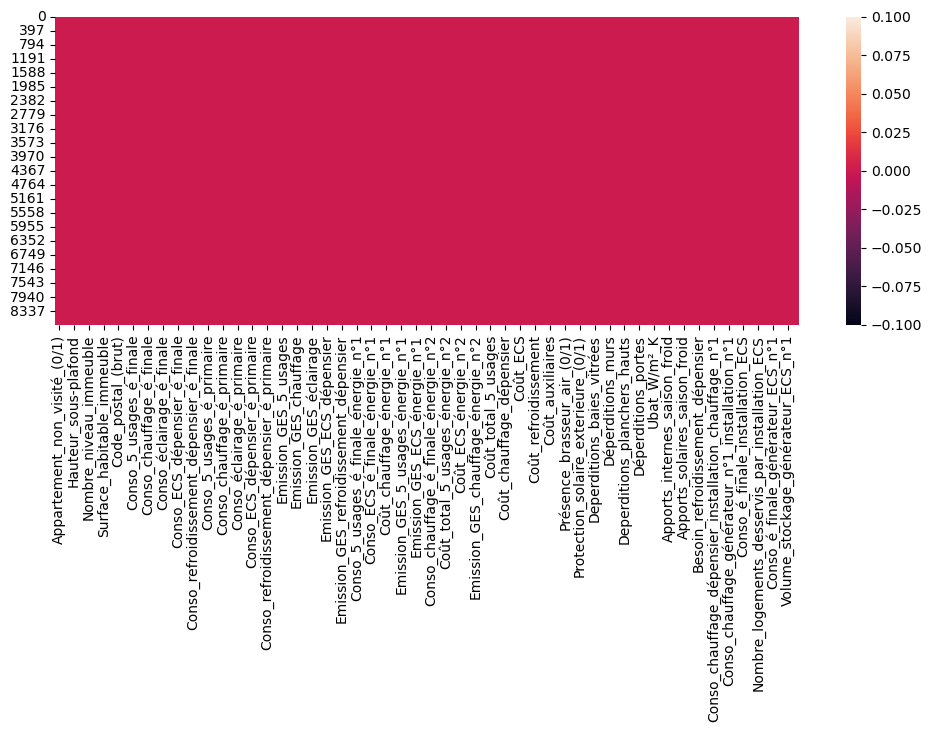

In [19]:
#visualison notre df_quanti
plt.figure(figsize=(12, 4))
sns.heatmap(df_quanti.isnull())
plt.show()

In [20]:
df_quanti = df_quanti.astype('float')

In [21]:
df_quanti.shape

(8718, 100)

Nos données quantitatives ont totalement été nettoyées.
Nous pouvons maintenant passer aux données qualitatives

## traitement df_quali

In [22]:
df_quali.sample(5)

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,Date_fin_validité_DPE,N°_DPE_immeuble_associé,Méthode_application_DPE,Etiquette_GES,Etiquette_DPE,Type_bâtiment,Type_installation_chauffage,Type_installation_ECS_(général),Période_construction,Classe_inertie_bâtiment,Classe_altitude,Zone_climatique_,Adresse_brute,Nom__commune_(BAN),Code_INSEE_(BAN),N°_voie_(BAN),Identifiant__BAN,Adresse_(BAN),Nom__rue_(BAN),Complément_d'adresse_bâtiment,Complément_d'adresse_logement,Statut_géocodage,N°_département_(BAN),Type_énergie_n°1,Type_énergie_n°2,Indicateur_confort_été,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_toit_terrase,Qualité_isolation_plancher_haut_comble_perdu,Besoin_ECS,Besoin_refroidissement,Type_énergie_principale_chauffage,Description_installation_chauffage_n°1,Configuration_installation_chauffage_n°1,Type_installation_chauffage_n°1,Type_émetteur_installation_chauffage_n°1,Description_générateur_chauffage_n°1_installation_n°1,Type_énergie_générateur_n°1_installation_n°1,Type_générateur_n°1_installation_n°1,Usage_générateur_n°1_installation_n°1,Type_énergie_principale_ECS,Description_installation_ECS,Configuration_installation_ECS,Type_installation_ECS,Description_générateur_ECS_n°1,Type_énergie_générateur_ECS_n°1,Type_générateur_ECS_n°1,Usage_générateur_ECS_n°1,Catégorie_ENR
6038,2480E4548320P,2024-12-23,2024-12-22,2024-12-22,DPE 3CL 2021 méthode logement,2034-12-21,NaN,dpe appartement individuel,B,D,appartement,individuel,individuel,1948-1974,Légère,inférieur à 400m,H1a,503 chaussée jules ferry,Amiens,80021,503,80021_4640_00503,503 Chaussée Jules Ferry 80090 Amiens,Chaussée Jules Ferry,24/IMO/0033,NaN,adresse géocodée ban à l'adresse,80,Électricité,NaN,insuffisant,très bonne,bonne,insuffisante,très bonne,NaN,moyenne,938,0,Électricité,Radiateur électrique à inertie (modélisé comme...,Installation de chauffage simple,installation individuelle,"radiateur électrique NFC, NF** et NF***",Electrique - Radiateur électrique à accumulation,Électricité,Radiateur électrique à accumulation,chauffage,Électricité,Ballon électrique à accumulation vertical (cat...,Un seul système d'ECS sans solaire,installation individuelle,Electrique - Ballon électrique à accumulation ...,Électricité,Ballon électrique à accumulation vertical Caté...,ecs,NaN
8499,2462E4534882B,2024-12-22,2024-12-21,2024-12-16,DPE 3CL 2021 méthode logement,2034-12-20,NaN,dpe maison individuelle,D,D,maison,NaN,NaN,avant 1948,Légère,inférieur à 400m,H1a,34 Rue Evrard,Leforest,62497,34,62497_0840_00034,34 Rue Florent Evrard 62790 Leforest,Rue Florent Evrard,MA2409155697,NaN,adresse géocodée ban à l'adresse,62,Gaz naturel,Électricité,moyen,bonne,bonne,bonne,insuffisante,NaN,moyenne,"1199,6",0,Gaz naturel,Chaudière individuelle gaz à condensation inst...,Installation de chauffage simple,installation individuelle,Radiateur bitube avec robinet thermostatique s...,Gaz Naturel - Chaudière gaz à condensation ins...,Gaz naturel,Chaudière gaz à condensation après 2015,chauffage + ecs,Gaz naturel,Combiné au système de chauffage,Un seul système d'ECS sans solaire,installation individuelle,Gaz Naturel - Chaudière gaz à condensation ins...,Gaz naturel,Chaudière gaz à condensation après 2015,chauffage + ecs,NaN
8046,2414E4551321M,2024-12-23,2024-12-22,2024-12-22,DPE 3CL 2021 méthode logement,2034-12-21,NaN,dpe appartement individuel,D,D,appartement,individuel,individuel,1948-1974,Lourde,inférieur à 400m,H1a,49 rue Armand Gasté,Vire Normandie,14762,NaN,14762_0055,Rue Armand Gaste 14500 Vire Normandie,Rue Armand Gaste,24/NMO/4544/QUENTIN_DE_COUPIGNY,NaN,adresse géocodée ban à l'adresse,14,Gaz naturel,Électricité,bon,insuffisante,moyenne,insuffisante,insuffisante,NaN,très bonne,"1273,4",0,Gaz naturel,Chaudière individuelle gaz à condensation inst...,Installation de chauffage simple,installation individuelle,Radiateur bitube avec robinet thermostatique s...,Gaz

Dans le cadre de l’analyse que je souhaitons mener, à savoir une analyse en composantes principales (ACP) et régression linéaire, je décide de ne conserver que les variables ordinales. 

En effet, ces méthodes statistiques supposent que les données sont quantitatives.

Cependant, les variables ordinales peuvent être considérées comme des variables causatives (car il y a une hiérarchie).

Les variables nominales, ne possédant pas d’ordre, ne permettraient pas une interprétation des résultats obtenus.

In [23]:
list(df_quali.columns)

['N°DPE',
 'Date_réception_DPE',
 'Date_établissement_DPE',
 'Date_visite_diagnostiqueur',
 'Modèle_DPE',
 'Date_fin_validité_DPE',
 'N°_DPE_immeuble_associé',
 'Méthode_application_DPE',
 'Etiquette_GES',
 'Etiquette_DPE',
 'Type_bâtiment',
 'Type_installation_chauffage',
 'Type_installation_ECS_(général)',
 'Période_construction',
 'Classe_inertie_bâtiment',
 'Classe_altitude',
 'Zone_climatique_',
 'Adresse_brute',
 'Nom__commune_(BAN)',
 'Code_INSEE_(BAN)',
 'N°_voie_(BAN)',
 'Identifiant__BAN',
 'Adresse_(BAN)',
 'Nom__rue_(BAN)',
 "Complément_d'adresse_bâtiment",
 "Complément_d'adresse_logement",
 'Statut_géocodage',
 'N°_département_(BAN)',
 'Type_énergie_n°1',
 'Type_énergie_n°2',
 'Indicateur_confort_été',
 'Qualité_isolation_enveloppe',
 'Qualité_isolation_menuiseries',
 'Qualité_isolation_murs',
 'Qualité_isolation_plancher_bas',
 'Qualité_isolation_plancher_haut_toit_terrase',
 'Qualité_isolation_plancher_haut_comble_perdu',
 'Besoin_ECS',
 'Besoin_refroidissement',
 'Type_

In [24]:
# nous allons sonserver que les variable ordinale

## attention : on utilise pas ces deux variable car elle sont trop vide : "	", "Qualité_isolation_plancher_haut_toit_terrase" et "Qualité_isolation_plancher_haut_comble_perdu"
## besoin ECS et besoin redfroidissement sont des valeur numerique mal formater, nous pouvons le voir dans l'affichage du dataframe juste ci dessus
var_ord = ["Etiquette_GES", "Etiquette_DPE", "Période_construction", "Classe_inertie_bâtiment", "Classe_altitude", 
           "Indicateur_confort_été", "Qualité_isolation_enveloppe",	"Qualité_isolation_menuiseries", "Qualité_isolation_murs", "Qualité_isolation_plancher_bas", 
          "Besoin_ECS", "Besoin_refroidissement"]

df_quali = df_quali[var_ord]

(8718, 12)


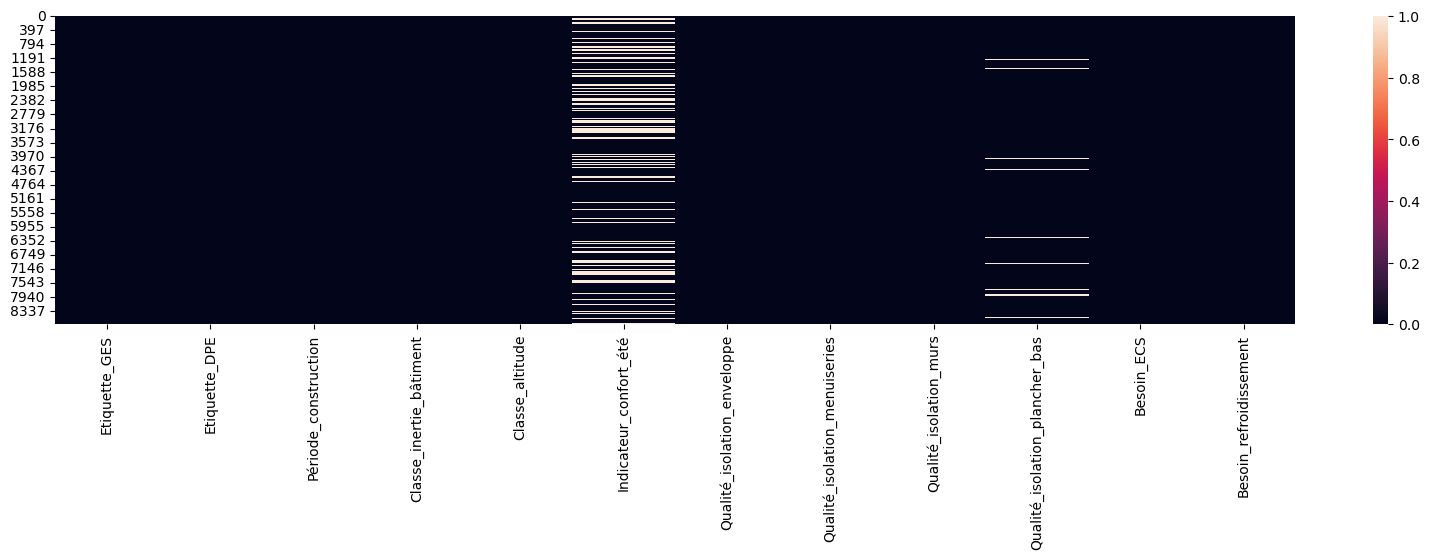

In [25]:
# visualisation de notre dataset pour identifier les valeur vide
print(df_quali.shape)
plt.figure(figsize=(20, 4))
sns.heatmap(df_quali.isnull())
plt.show()

In [26]:
df_quali.head()

,Etiquette_GES,Etiquette_DPE,Période_construction,Classe_inertie_bâtiment,Classe_altitude,Indicateur_confort_été,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Besoin_ECS,Besoin_refroidissement
0,C,F,1978-1982,Lourde,400-800m,insuffisant,bonne,moyenne,moyenne,moyenne,"1430,4",0
1,B,D,1989-2000,Légère,inférieur à 400m,moyen,bonne,bonne,moyenne,bonne,"1084,4",0
2,B,D,1948-1974,Très lourde,inférieur à 400m,NaN,moyenne,très bonne,insuffisante,insuffisante,"18727,3",0
3,B,D,après 2021,Légère,inférieur à 400m,insuffisant,insuffisante,insuffisante,insuffisante,très bonne,"861,9",0
4,A,C,2006-2012,Légère,inférieur à 400m,moyen,très bonne,bonne,bonne,bonne,"1275,2","682,1"


In [27]:
somme_na = df_quali.isna().sum()
somme_na[somme_na != 0]

Indicateur_confort_été            2253
Qualité_isolation_murs               5
Qualité_isolation_plancher_bas     434
dtype: int64

In [28]:
# conversion de ses deux colonnes qui sont en realité des float 
df_quali[["Besoin_ECS", "Besoin_refroidissement"]] = df_quali[["Besoin_ECS", "Besoin_refroidissement"]].map(lambda x: x.replace(",", "."))
df_quali[["Besoin_ECS", "Besoin_refroidissement"]] = df_quali[["Besoin_ECS", "Besoin_refroidissement"]].astype(float)
df_quanti[["Besoin_ECS", "Besoin_refroidissement"]] = df_quali[["Besoin_ECS", "Besoin_refroidissement"]]
df_quali = df_quali.drop(["Besoin_ECS", "Besoin_refroidissement"], axis=1)

In [29]:
for col in df_quali.select_dtypes("object").columns :
    df_quali[col] = df_quali[col].fillna( df_quali[col].mode()[0])

Nos données quantitatives sont totalement nettoyées, nous pouvons passer à l'analyse des variables restantes

<hr>

# Exploration de données

## Exploration données qualitative (df_quali)

In [30]:
df_quali.describe()

,Etiquette_GES,Etiquette_DPE,Période_construction,Classe_inertie_bâtiment,Classe_altitude,Indicateur_confort_été,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas
count,8718,8718,8718,8718,8718,8718,8718,8718,8718,8718
unique,7,7,10,4,3,3,4,4,4,4
top,C,D,1948-1974,Légère,inférieur à 400m,insuffisant,insuffisante,moyenne,insuffisante,insuffisante
freq,2366,2923,2709,2925,8226,5116,4821,3924,5066,3945


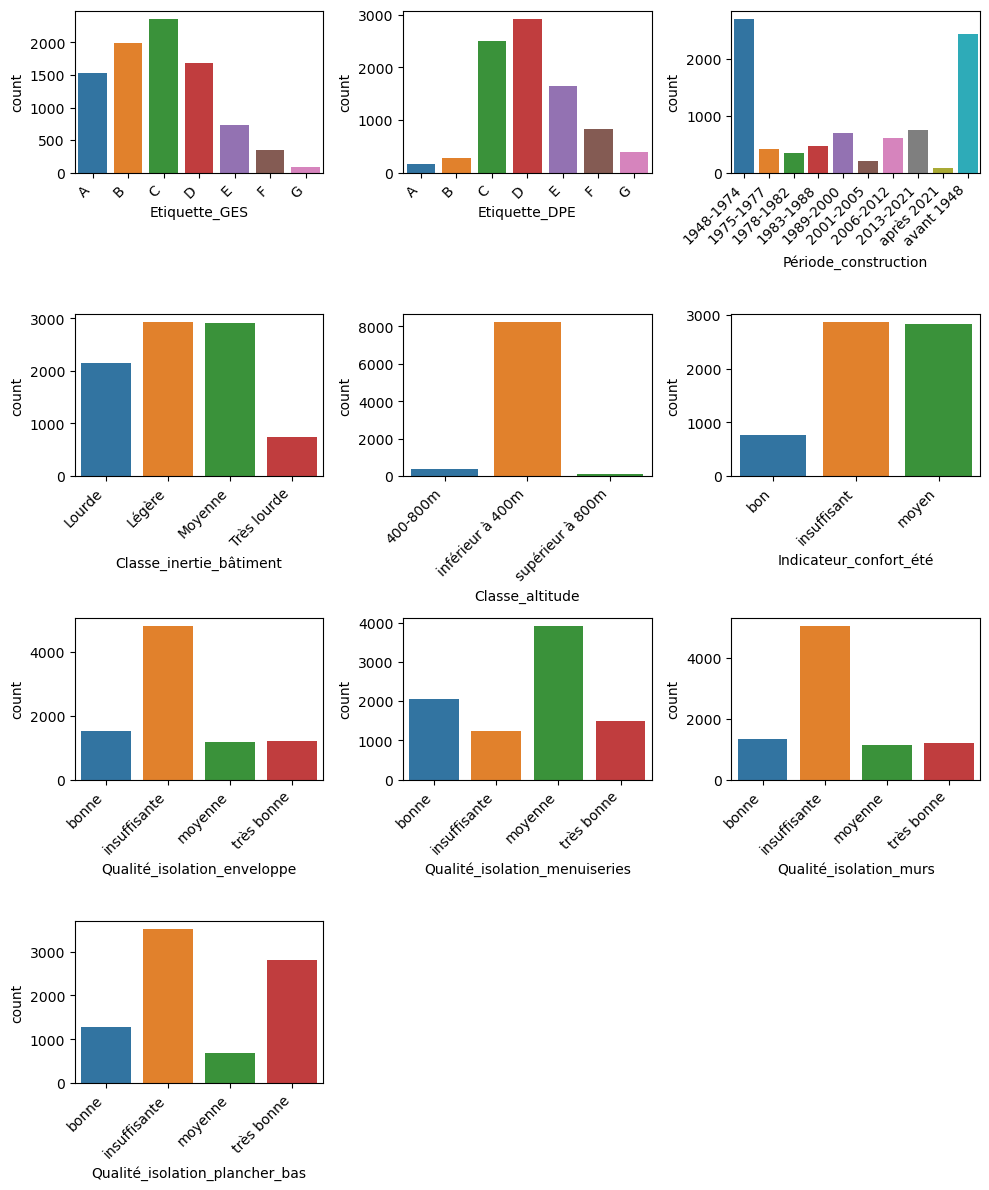

In [31]:
n_lignes = (len(df_quali.columns) + 2) // 3
plt.figure(figsize=(10, 3 * n_lignes))
for i, colonne in enumerate(df_quali.columns):
    plt.subplot(n_lignes, 3, i + 1)  # Créer un subplot
    sns.countplot(data=df, x=colonne, order=sorted(list(df_quali[colonne].unique())))
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

**1. Étiquette_GES** \
    La majorité des logements sont classés en catégories B et C indiquant des émissions de gaz à effet de serre moyennes (assez bonnes voire bonnes) et aussi de nombreux bâtiments qui ont une classe A, ce qui est très bien. Très peu de logements sont classés en E, F ou G (environ 1500 cumulés) , ce qui montre un une bonne efficacité au niveau de l'émission de gaz à effet de serre.

**2.Étiquette_DPE** \
    Les logements sont très majoritairement en D et E, soulignant une performance énergétique médiocre. Cela suggère des besoins importants en rénovation énergétique. De plus, la part des batiments de classe A et B est assez faible.

**3.Période_construction** \
    Les logements les plus représentés datent d'avant 1974, ce qui rend les coût de renovation assez élever. Ce sont des périodes où les normes d’isolation étaient moins strictes, ce qui peut expliquer les mauvaises performances au niveau du DPE. 

**4.Classe_inertie_bâtiment** \
     L'inertie thermique d'un bâtiment est sa capacité à stocker, à conserver puis à restituer la chaleur de manière diffuse. Plus cette inertie est élevée, plus le bâtiment mettra du temps à se refroidir en hiver et se réchauffer en été. Les bâtiments à inertie moyenne et lourde dominent. Ils favorisent donc les bonnes performances énergétiques. Cependant, nous constatons qu'il y a également pas mal de bâtiments à inertie légère. ces bâtiments ont besoin de rénovation afin d'améliorer leur inertie
     
**5.Classe_altitude** \
    La grande majorité des batiments se situe à une altitude inférieure à 400 mètres, avec un nombre d'occurrences au environ de 8000. Cela tous a fait coherent avec l'altitude moyenne de la France, qui est d'environ 342 mètres.

**6.Indicateur_confort_été** \
    Le confort est jugé moyen à médiocre dans la majorité des cas. Cela pourrait être lié à une mauvaise isolation et à une faible efficacité thermique des bâtiments.


**7.Qualité_isolation_enveloppe** \
    La qualité de l’isolation de l’enveloppe est souvent insuffisante, ce qui impacte directement les performances DPE et le confort thermique.

**8.Qualité_isolation_menuiseries**
    Même tendance que l’enveloppe : les menuiseries sont majoritairement de qualité moyenne, contribuant aux pertes thermiques.

**9.Qualité_isolation_murs** \
    Une bonne proportion de murs n'est pas bien isolée (insuffisante), ce qui impacte directement les performances DPE et le confort thermique.

**10.Qualité_isolation_plancher_bas** \
    Même tendance que l’enveloppe : la qualité de isolation du plancher bas sont majoritairement de qualité insuffisante, contribuant aux pertes thermiques.

**Conclusion** \
    Ce diagnostic montre que les logements émettent peu de gaz à effet de serre, ce qui est positif. En revanche, ils consomment beaucoup d’énergie, ce qui n’est pas bon. La plupart des bâtiments sont anciens et mal isolés, ce qui explique ces mauvais résultats.
    Il est donc important de faire des travaux pour améliorer l’isolation (des murs, des sols, des fenêtres…) et ainsi réduire les pertes de chaleur. Il faudrait aussi améliorer le confort en été en ventilant mieux les batiments.

<hr>

Ici, nous allons convertir ces données textuelles en nombre

In [32]:
etiquette = {"A" : 6, "B" : 5, "C" : 4, "D" : 3, "E" : 2, "F" : 1, "G" : 0}
periode = {'avant 1948': 0, '1948-1974': 1, '1975-1977': 2, '1978-1982': 3, '1983-1988': 4, '1989-2000': 5, '2001-2005': 6, '2006-2012': 7, '2013-2021': 8, 'après 2021': 9 }
classe_iner_bat = {"Légère" : 0, "Moyenne" : 1, "Lourde" : 2, "Très lourde" : 3}
indicateur ={"insuffisant" : 0, "moyen" : 1, "bon" : 2}
qualité = {"insuffisante" : 0, "moyenne" : 1, "bonne" : 2, "très bonne" : 3}

df_quali[["Etiquette_GES", "Etiquette_DPE"]] = df_quali[["Etiquette_GES", "Etiquette_DPE"]].replace(etiquette)
df_quali["Période_construction"] = df_quali["Période_construction"].replace(periode)
df_quali["Classe_inertie_bâtiment"] = df_quali["Classe_inertie_bâtiment"].replace(classe_iner_bat)
df_quali['Indicateur_confort_été'] = df_quali['Indicateur_confort_été'].replace(indicateur)
df_quali[["Qualité_isolation_enveloppe",	"Qualité_isolation_menuiseries", "Qualité_isolation_murs", "Qualité_isolation_plancher_bas"]] = df_quali[["Qualité_isolation_enveloppe",	"Qualité_isolation_menuiseries", "Qualité_isolation_murs", "Qualité_isolation_plancher_bas"]].replace(qualité)

df_quali = df_quali.select_dtypes('int')

In [33]:
df_quali.head()

,Etiquette_GES,Etiquette_DPE,Période_construction,Classe_inertie_bâtiment,Indicateur_confort_été,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas
0,4,1,3,2,0,2,1,1,1
1,5,3,5,0,1,2,2,1,2
2,5,3,1,3,0,1,3,0,0
3,5,3,9,0,0,0,0,0,3
4,6,4,7,0,1,3,2,2,2


## Exploration données quantitative (df_quali)

In [34]:
df_quanti.shape

(8718, 102)

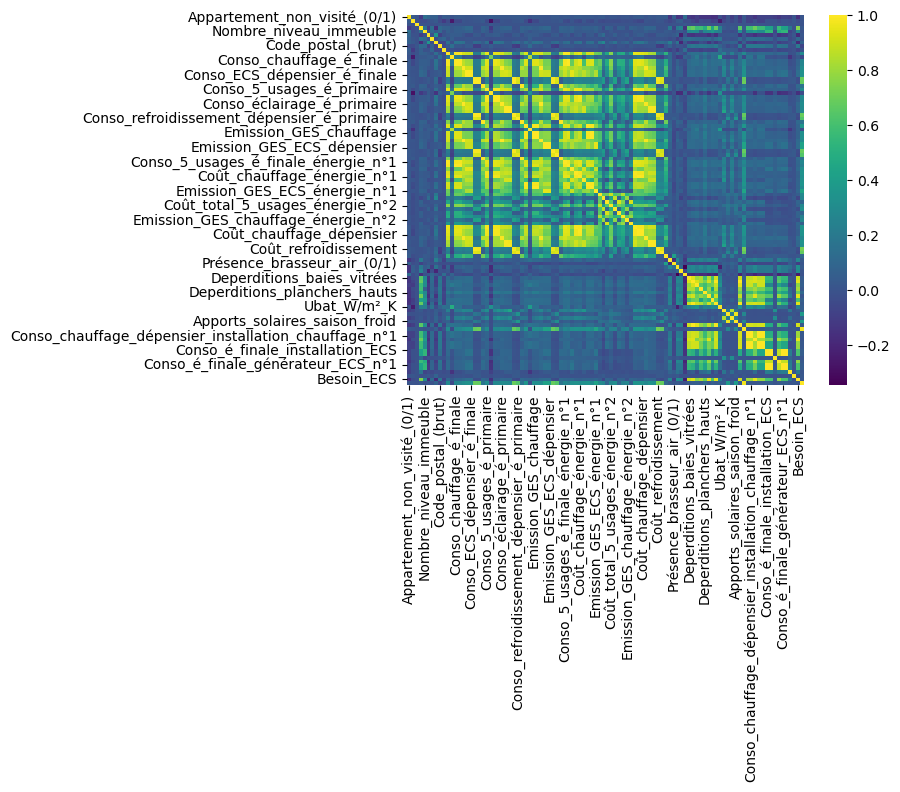

In [35]:
sns.heatmap(df_quanti.corr(), cmap="viridis")
plt.show()

Cette matrice de corrélation montre qu’il existe de très fortes corrélations positives entre plusieurs groupes de variables, en particulier celles liées à la consommation d’énergie, de chauffage, aux coûts, et aux émissions. \
Ces relations apparaissent clairement sous forme de blocs jaunes bien marqués, indiquant que ces variables évoluent souvent ensemble. \
En revanche, on ne remarque pas de corrélations négatives significatives dans l’ensemble des données. \
Cela signifie qu’il n’y a pas de variables qui varient en sens opposé de manière marquée. \
Dans ce contexte, il peut être pertinent de faire une regression lineaire.\
Nous allons donc identifier toutes les variables fortement corrélées entre elles, puis effectuer des régressions linéaires deux à deux afin de modéliser leurs relations. \
Cela nous permettra de supprimer un maximum de variables redondantes tout en conservant l'information essentielle.

##  fusion de df_quanti et df_quali (ordinale)

Nous allons fusionner df_quali et df_quanti en un seul dataframe, df_clean

In [36]:
df_clean = pd.concat([df_quanti, df_quali], axis=1)
df_clean.shape

(8718, 111)

# Creation de fonction

## Regression linaire

In [37]:
# Fonction pour faire une regression multiple
def linearRegressionFit(x, y): 
    """
    Définition : 
        linearRegressionFit(x, y) effectue une régression linéaire multiple en utilisant la méthode des moindres carrés.
    Paramètres:
        - x (numpy.ndarray): Matrice des variables explicatives (n, p), où n est le nombre d'observations et p le nombre de variables.
        - y (numpy.ndarray): Vecteur colonne des valeurs cibles (n, 1).
        - level (float, optionnel): Niveau de confiance pour l'intervalle de confiance (non utilisé dans cette fonction). Par défaut à 0.95.
        
    Retourne:
        - m (numpy.ndarray): Vecteur des coefficients estimés (p+1, 1), incluant le biais (intercept).
    
    Exemples:
    ```python
    import numpy as np
    
    X = np.array([[1, 2], [3, 4], [5, 6]])
    Y = np.array([[2], [3], [4]])
    
    coefficients = linearRegressionFit(X, Y)
    print("Coefficients estimés:", coefficients)
    """
    # copy des données pour ne pas les affecter lorsque l'on modifie le tableau
    x_copy = x.copy()
    y_copy = y.copy()

    # ajout d'une colonne de 1 pour le Biais (a + bx1 + cx2 + ....)
    x_copy = np.concatenate((np.ones((x_copy.shape[0], 1)), x_copy), axis = 1)

    # calcul des valeur des paramettre de notre regression
    inv_txx = np.linalg.inv(x_copy.T.dot(x_copy))
    m = inv_txx.dot(x_copy.T).dot(y_copy)
    
    return m 

In [38]:
def cal_ic(x, y, m, level=0.95):
    """
    Calcule les intervalles de confiance des coefficients d'une régression linéaire multiple.
    
    Cette fonction estime les intervalles de confiance à un niveau donné pour chaque paramètre 
    du modèle de régression linéaire, en supposant une distribution normale des erreurs.
    
    Paramètres
    ----------
    x : ndarray
        Matrice des variables explicatives (de dimension n x p, sans biais).
    y : ndarray
        Vecteur des observations (de dimension n x 1).
    m : ndarray
        Vecteur des coefficients estimés du modèle (de dimension (p+1) x 1), incluant le biais.
    level : float, optionnel
        Niveau de confiance pour l'intervalle (par défaut 0.95 pour un IC à 95%).
    
    Retours
    -------
    ic : ndarray
        Matrice de dimension (p+1) x 2 contenant les bornes inférieure et supérieure 
        des intervalles de confiance pour chaque paramètre du modèle.
    
    Notes
    -----
    - Cette fonction ajoute automatiquement un biais (colonne de 1) à la matrice `x`.
    - Elle utilise la distribution de Student pour le calcul des intervalles.
    - La variance des erreurs est supposée constante (homoscédasticité).
    """
    # copy des données pour ne pas les affecter lorsque l'on modifie le tableau
    x_copy = x.copy()
    y_copy = y.copy()
    
    # ajout d'une colonne de 1 pour le Biais (a + bx1 + cx2 + ....)
    x_copy = np.concatenate((np.ones((x_copy.shape[0], 1)), x_copy), axis = 1)
    
    # calcul des erreur  et sigma²
    e = y_copy - x_copy.dot(m)
    sigma2 = (e.T.dot(e) / (x_copy.shape[0] - x_copy.shape[1])).reshape(1)
    
    # calcul matrice variance_covariance
    cov_var_matrix = sigma2 * np.linalg.inv(x_copy.T.dot(x_copy))
    
    # calcul des IC des param a level pourcent
    level = level + (1- level)/2
    t_val = t.ppf(level, x_copy.shape[0] - x_copy.shape[1])
    ic = np.array([
        [m[i, 0] - t_val * np.sqrt(cov_var_matrix[i, i]), 
         m[i, 0] + t_val * np.sqrt(cov_var_matrix[i, i])] 
        for i in range(m.shape[0])])
    
    return ic


In [39]:
def predict(x, m) : 
    """
    Effectue une prédiction à partir d'un modèle de régression linéaire.

    Cette fonction ajoute automatiquement un biais (colonne de 1) à la matrice `x` 
    avant de calculer les prédictions à l'aide des coefficients `m`.

    Paramètres
    ----------
    x : ndarray
        Matrice des variables explicatives (de dimension n x p, sans biais).
    m : ndarray
        Vecteur des coefficients du modèle (de dimension (p+1) x 1), incluant le biais.

    Retour
    ------
    y_pred : ndarray
        Vecteur des valeurs prédites (de dimension n x 1).
    """
    return np.concatenate((np.ones((x.shape[0], 1)), x), axis = 1).dot(m)

In [40]:
def cal_coeff_determination(x, y, m):
    """
    Calcule le coefficient de détermination R² pour un modèle de régression linéaire.

    Paramètres
    ----------
    x : ndarray
        Matrice des variables explicatives (de dimension n x p, sans biais).
    y : ndarray
        Vecteur des observations réelles (de dimension n x 1).
    m : ndarray
        Vecteur des coefficients du modèle (de dimension (p+1) x 1), incluant le biais.

    Retour
    ------
    R2 : float
        Coefficient de détermination R².
    """
    # calculate y_pred 
    y_pred = predict(x, m)

    # calculate R2
    numerator = (y - y_pred).T.dot(y - y_pred)
    denominator = (y - y.mean()).T.dot(y - y.mean())
    R2 = 1 - (numerator / denominator)

    # RETURN VALUE
    return float(R2)


## ACP 

In [41]:
# cette fonction normalise nos données
def normalisation(x): 
    """
    Normalise les variables explicatives en centrant et réduisant chaque colonne.

    Paramètres
    ----------
    x : ndarray
        Matrice des variables explicatives (de dimension n x p).

    Retour
    ------
    x_norm : ndarray
        Matrice normalisée, de même dimension que `x`, avec chaque colonne centrée réduite.
    """
    return (x - x.mean(axis=0)) / x.std(axis=0)


In [42]:
# cette fonction retourne la matrice de correlation : 
def mat_coef_corr(x) : 
    """
    Calcule la matrice de coefficients de corrélation de x.

    Paramètres
    ----------
    x : ndarray
        Matrice des variables (de dimension n x p).

    Retour
    ------
    mat_corr : ndarray
        Matrice de dimension p x p contenant les produits scalaires normalisés entre colonnes.

    Notes
    -----
    - Ce n’est pas la matrice de corrélation classique (centrée-réduite).
      Pour une vraie matrice de corrélation, il faut normaliser les colonnes de `x`
      (centrer à la moyenne et diviser par l'écart-type) avant d'appeler cette fonction.
    """
    return x.T.dot(x) / x.shape[0]


In [43]:
# determination de valeur propre et vecteur propre 
def det_val_and_vec_propre(coef_mat) : 
    """
    Calcule les valeurs propres et les vecteurs propres d'une matrice, et trie par ordre décroissant.

    Paramètres
    ----------
    coef_mat : ndarray
        Matrice carrée (de dimension p x p), : une matrice de corrélation

    Retour
    ------
    val_p : ndarray
        Vecteur contenant les valeurs propres triées (du plus grand au plus petit).
    vec_p : ndarray
        Matrice dont les colonnes sont les vecteurs propres correspondants aux valeurs propres triées.
    """
    val_p, vec_p = np.linalg.eig(coef_mat)
    
    # tier les valeur propre du plus grand au plus pedit et ordonne aussi les vecteur propre
    idx = np.argsort(val_p)[::-1]  
    val_p = val_p[idx]
    vec_p = vec_p[:, idx]
    return (val_p, vec_p)


In [44]:
#inertie expliquer 
def inertie_explique(val_p): 
    """
    Calcule l'inertie expliquée par chaque composante à partir des valeurs propres.

    Paramètres
    ----------
    val_p : ndarray or list
        Vecteur des valeurs propres, généralement issues d'une décomposition de matrice de corrélation ou covariance.

    Retour
    ------
    iner : ndarray
        Liste contenant la part d'inertie expliquée par chaque composante (valeurs entre 0 et 1).
    """
    iner = np.array([i / val_p.sum() for i in val_p])
    return iner 

In [45]:

# cette fonction projete nos données 
def projecter(data, base):
    """
    Projette les données sur une nouvelle base vectorielle.

    Paramètres
    ----------
    data : ndarray
        Matrice de données initiales (de dimension n x p), où chaque ligne est une observation 
        et chaque colonne une variable.
    base : ndarray
        Matrice représentant la base cible (de dimension p x k), chaque colonne étant un 
         un vecteur propre.

    Retour
    ------
    proj : ndarray
        Matrice projetée (de dimension n x k), contenant les coordonnées des observations 
        dans la nouvelle base.
    """
    proj = data.dot(base) 
    return proj 


In [46]:
def contribution_individu(data_proj, val_p) :
    """
    Calcule la contribution individuelle de chaque observation à l'inertie expliquée par chaque composante.

    Paramètres
    ----------
    data_proj : ndarray
        Matrice des données projetées (de dimension n x k), où chaque ligne représente une observation
        et chaque colonne une composante principale.
    val_p : ndarray
        Vecteur des valeurs propres (de dimension k), représentant l'inertie expliquée par chaque composante 
        dans une ACP ou une analyse similaire.

    Retour
    ------
    contrib : ndarray
        Matrice (n x k) des contributions individuelles, où chaque élément représente la contribution
        d'un individu à une composante spécifique.
    """
    return (data_proj**2) / (val_p.reshape(1, -1) * data_proj.shape[0])


In [47]:
def qualite_representation(data_proj): 
    """
    Calcule la qualité de la représentation de chaque individu dans chaque composante principale.

    Paramètres
    ----------
    data_proj : ndarray
        Matrice des données projetées (de dimension n x k), où chaque ligne représente une observation 
        et chaque colonne une composante principale.

    Retour
    ------
    qualite : ndarray
        Matrice (n x k) contenant la qualité de la représentation de chaque individu dans chaque composante. 
        Chaque valeur représente la proportion de la variance totale de chaque individu expliquée par chaque 
        composante principale.
    """
    data_carre = data_proj**2
    norme_individu = data_carre.sum(axis=1).reshape(-1, 1)
    qualite = data_carre / norme_individu
    return qualite


In [48]:
def corr_vec_p_var(vec_p, val_p): 
    """
    Calcule la matrice de corrélation entre les vecteurs propres et les variables.

    Paramètres
    ----------
    vec_p : ndarray
        Matrice des vecteurs propres (de dimension p x k), où chaque colonne est un vecteur propre associé 
        à une composante principale.
    val_p : ndarray
        Vecteur des valeurs propres (de dimension k), représentant l'inertie expliquée par chaque composante.

    Retour
    ------
    corr_matrix : ndarray
        Matrice de corrélation (de dimension p x k), où chaque colonne correspond à la corrélation entre 
        les vecteurs propres et les variables d'origine.
    """
    return vec_p.dot(np.diag(np.sqrt(val_p)))


In [49]:
def cercle_corr(val_p, vec_p, list_col = None, list_col_to_print = None, indice_base = (0, 1), ax = None) : 
    """
    Trace un cercle de corrélation pour visualiser la relation entre les variables et les composantes principales.

    Paramètres
    ----------
    val_p : ndarray
        Vecteur des valeurs propres (de dimension k), représentant l'inertie expliquée par chaque composante 
        dans une analyse en composantes principales.
    vec_p : ndarray
        Matrice des vecteurs propres (de dimension p x k), où chaque colonne représente un vecteur propre 
        associé à une composante principale.
    list_col : list, optionnel
        Liste des noms de toutes les variables, pour pouvoir recuperer l'indices. Si `None`, 
        toutes les variables seront affichées.
    list_col_to_print : list, optionnel
        Liste des noms de colonnes spécifiques à afficher sur le graphique. Si `None`, toutes les colonnes 
        seront utilisées.
    indice_base : tuple, optionnel
        Indices des composantes principales à afficher sur le graphique. Par défaut, cela affiche les deux 
        premières composantes `(0, 1)`.
    ax : matplotlib axis, l'axe ou tracer la courbe, si none, on creer un en interne

    Retour
    ------
    None
        La fonction ne retourne rien, elle affiche un graphique de type matplotlib avec le cercle de corrélation 
        et les flèches représentant les projections des variables sur les composantes principales.

    Notes
    -----
    - Cette fonction utilise `corr_vec_p_var` pour calculer les corrélations pondérées entre les variables 
      et les composantes principales.
    - Les flèches sur le graphique représentent la direction et l'intensité de la corrélation entre chaque 
      variable et les deux premières composantes principales.
    """

    if ax is None:
        fig, ax = plt.subplots()
    
    # Tri des indices pour garantir un ordre croissant
    indice_base = sorted(indice_base)

    # Création de la figure du graphique
    # ax.figure(figsize=(6,6))
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.axhline(0, color='black', linewidth=1)  
    ax.axvline(0, color='black', linewidth=1)
    ax.set_aspect('equal')

    # Ajout du cercle de rayon 1 centré en (0,0)
    cercle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dashed', linewidth=1)
    ax.add_patch(cercle)

    # Calcul des corrélations 
    corr = corr_vec_p_var(vec_p, val_p)

    # get indice des colonnes a afficher
    if list_col is not None and list_col_to_print is not None: 
        indices = np.where(np.isin(list_col, list_col_to_print))[0]
    else : 
        indices = list(range(corr.shape[0]))

    # Extraction des projections sur les composantes principales spécifiées
    x = corr[indices, indice_base[0]]
    y = corr[indices, indice_base[1]]
    
    # Affichage des flèches représentant les projections des variables
    for i in range(len(x)):
        ax.arrow(0, 0, x[i], y[i], head_width=0.01, head_length=0.01, fc='r', ec='r')
        if list_col_to_print is None:
            list_col_to_print = list(range(len(val_p)))
        ax.text(x[i] + 0.05, y[i] + 0.05, list_col_to_print[i], fontsize=5)


In [50]:
def plot_plan_fact(proj, inertie, indice_base = (0, 1), ax = None): 
    """
    Trace la projection des individus sur un plan factoriel, représentant les deux premières composantes principales.

    Paramètres
    ----------
    proj : ndarray
        Matrice des données projetées (de dimension n x k), où chaque ligne représente un individu et chaque 
        colonne une composante principale. Ce sont les coordonnées des individus dans le nouvel espace des 
        composantes principales.
    inertie : ndarray
        Vecteur des inerties (valeurs propres normalisées) associées à chaque composante principale. 
        Chaque valeur représente la proportion de la variance expliquée par la composante.
    indice_base : tuple, optionnel
        Tuple indiquant les indices des deux composantes principales à afficher dans le plan factoriel. Par défaut, 
        il s'agit des deux premières composantes `(0, 1)`.
    ax : matplotlib axis, l'axe ou tracer la courbe, si none, on creer un en interne

    Retour
    ------
    None
        La fonction n'a pas de valeur de retour. Elle affiche simplement le graphique de la projection des individus 
        dans le plan factoriel à l'aide de `matplotlib` et `seaborn`.

    Notes
    -----
    - Le graphique affichera un plan avec les axes représentant les composantes principales spécifiées par 
      `indice_base`.
    - L'axe X correspond à la première composante principale et l'axe Y à la deuxième composante principale, 
      avec les pourcentages de variabilité expliquée sur chaque axe.
    """
    
    if ax is None:
        fig, ax = plt.subplots()
    
    indice_base = sorted(indice_base)
    
    # plt.figure(figsize=(6, 6))
    ax.grid()
    ax.axhline(0, color='black', linewidth=1)  
    ax.axvline(0, color='black', linewidth=1)
    
    ax.set_xlabel("composante 1 : " + str(np.round(inertie[indice_base[0]]*100, 2)) + "% de la variabilité")
    ax.set_ylabel("composante 2 : " + str(np.round(inertie[indice_base[1]]*100, 2)) + "% de la variabilité")
    ax.set_title("projection de nos individu sur un plan factoriel qui explique " + str(np.round(inertie[indice_base[0]]*100 + inertie[indice_base[1]]*100, 2)) + "% de notre variabilité")
    
    ax.scatter(proj[:, indice_base[0]], proj[:, indice_base[1]])

In [51]:
def acp(X) :
    # calcule de la matrice centrer et reduite
    X_cr = normalisation(X)
    
    # calcul matrice de correlation 
    corr = mat_coef_corr(X_cr)
    
    # deermination des valeurs propres et vecteurs propres
    val_p, vec_p = det_val_and_vec_propre(corr)
    
    # calcul inertie expliquer
    inertie = inertie_explique(val_p)
    
    # projection des données
    X_proj = projecter(X_cr, vec_p)

    # retourn valeur
    return (X_cr, corr, val_p, vec_p, inertie, X_proj)

## Autre

In [52]:
# fonction pour generer toutes les compinaison possible de 2 parmi n d'une liste 
def C2n(vec) : 
    temp = []
    for i in range(len(vec)) :
        for j in range(i + 1, len(vec)) : 
            temp.append([vec[i], vec[j]])

    return temp

C2n([1,2, 3])

[[1, 2], [1, 3], [2, 3]]

# Reduction de dimensions

## regression lineaire

Je vais réaliser une régression linéaire afin de détecter les paires de variables dont le coefficient de détermination (R²) est supérieur à 90 %. 
Pour chaque paire de variables fortement corrélées, un modèle de régression linéaire sera entraîné. 
Les résultats du modèle, comprenant le nom des variables impliquer, les paramètres de la régression, les intervalles de confiance des paramètres de la régression, ainsi que la valeur de R², seront ensuite enregistrés dans un DataFrame.

Nos données initiales ne seront pas supprimées. Nous obtiendrons plutôt une liste des variables restantes, c'est-à-dire celles qui ne sont pas fortement corrélées entre elles. 
Cette liste permettra de conserver uniquement les variables "indépendantes", tout en préservant l'intégrité de l'ensemble de données initial. 

In [53]:
df_quanti = df_clean.drop("Etiquette_DPE", axis=1)

In [54]:
# recuperer la liste des colonnes dans une liste 
df_quanti_col = list(df_quanti.columns)

# y = b + ax (nous modélisons avec deux variable pour pouvoir supprimé le max de variable)
df_lin_regression = {"y" : [], "x" : [], "a" : [], "b" : [], "R2" : [], "ic_a" : [], "ic_b" : []}

#genere toute les compinaison de 2 possible de nos colonnes
combi_quant_col = C2n(df_quanti_col)

# seuil du coef de determination fixé pour dire si nous pouvons conservé ce modele de regression (si il est significatif)
seuil = 0.90

# tqdm pour connaitre l'avancement de notre code
with tqdm(total=len(combi_quant_col), desc="Progression", unit="pair") as pbar:
    # initialisation de i (la ieme combinaison a testé)
    i = 0
    while i < len(combi_quant_col):

        # temp_df = df_quanti[combi_quant_col[i]]

        # recupere les données sous format de array numpy puis redimentionne pour ne pas avoir de probleme avec le produit matriciel
        x = df_quanti[combi_quant_col[i][0]].values.reshape(-1, 1)
        y = df_quanti[combi_quant_col[i][1]].values.reshape(-1, 1)

        # entraine le modele et calcu de ic(interval de confiance) R²(coef de determination)
        m = linearRegressionFit(x, y)
        ic = cal_ic(x, y, m)
        r2 = cal_coeff_determination(x, y, m)

        if r2 >= seuil: # si R² est supperieur ou egal au seuil
            # enregistrement de la regression
            df_lin_regression["x"].append(combi_quant_col[i][0])
            df_lin_regression["y"].append(combi_quant_col[i][1])
            df_lin_regression['a'].append(m[0, 0])
            df_lin_regression['b'].append(m[1, 0])
            df_lin_regression["R2"].append(r2)
            df_lin_regression["ic_a"].append(ic[1,:])
            df_lin_regression["ic_b"].append(ic[0,:])

            # suppresson de la variable y (expliqué)
            df_quanti_col.remove(combi_quant_col[i][1])

            # reinitialisation de la boucle => recalcul des nouvelles combinaison et reset de i à 0
            i = 0
            combi_quant_col = C2n(df_quanti_col)
            
            pbar.reset(total=len(combi_quant_col))  # Réinitialise tqdm si la taille change
        else: # sinon incrementation de i
            i += 1
            pbar.update(1)  # Met à jour la barre de progression

df_lin_regression = pd.DataFrame(df_lin_regression)


Progression: 100%|█████████████████████████████████████████████████████████████| 2211/2211 [00:02<00:00, 1055.74pair/s]


In [55]:
print(df_lin_regression.shape)
df_lin_regression.head()

(43, 7)


,y,x,a,b,R2,ic_a,ic_b
0,Conso_chauffage_é_finale,Conso_5_usages_é_finale,21.844943,0.759261,0.974822,"[0.7566991697550836, 0.7618232880853977]","[-94.97741486504492, 138.66730104273006]"
1,Conso_chauffage_dépensier_é_finale,Conso_5_usages_é_finale,-56.542692,0.951984,0.977710,"[0.9489655351661211, 0.9550016713855186]","[-194.15771628300914, 81.07233135628408]"
2,Conso_5_usages_é_primaire,Conso_5_usages_é_finale,3139.968237,1.168047,0.912231,"[1.160439650480407, 1.1756541640135385]","[2793.0997158648843, 3486.8367576293876]"
3,Conso_5_usages_é_finale_énergie_n°1,Conso_5_usages_é_finale,-179.602762,0.916400,0.989325,"[0.914401090467216, 0.9183985949079141]","[-270.7399812594697, -88.46554316512128]"
4,Conso_chauffage_é_finale_énergie_n°1,Conso_5_usages_é_finale,-394.645075,0.744586,0.970594,"[0.7418644763648998, 0.7473068962977758]","[-518.7242411709992, -270.56590892779724]"


Il nous reste  :  67 colonnes


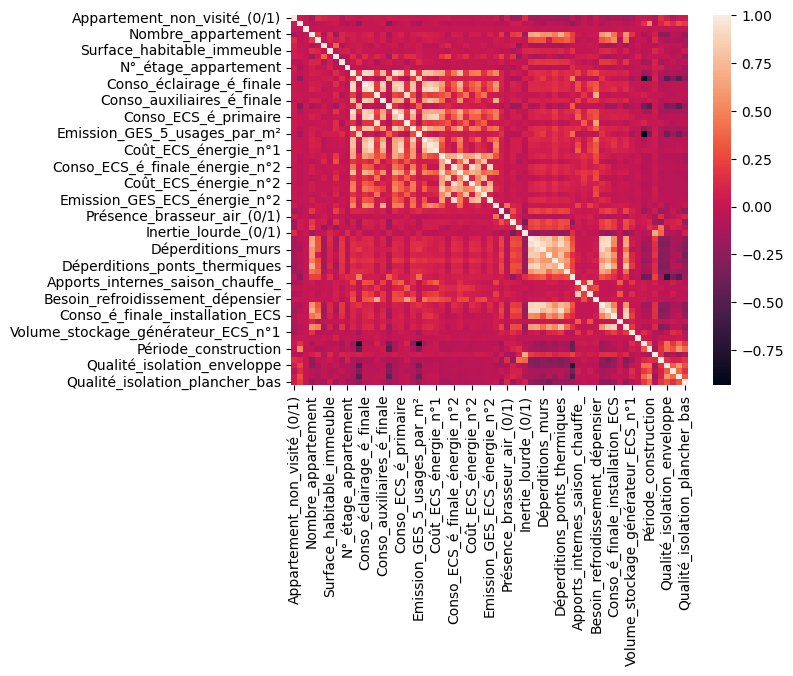

In [56]:
print("Il nous reste  : ", len(df_quanti_col), "colonnes")
sns.heatmap(df_quanti[df_quanti_col].corr())
plt.show()

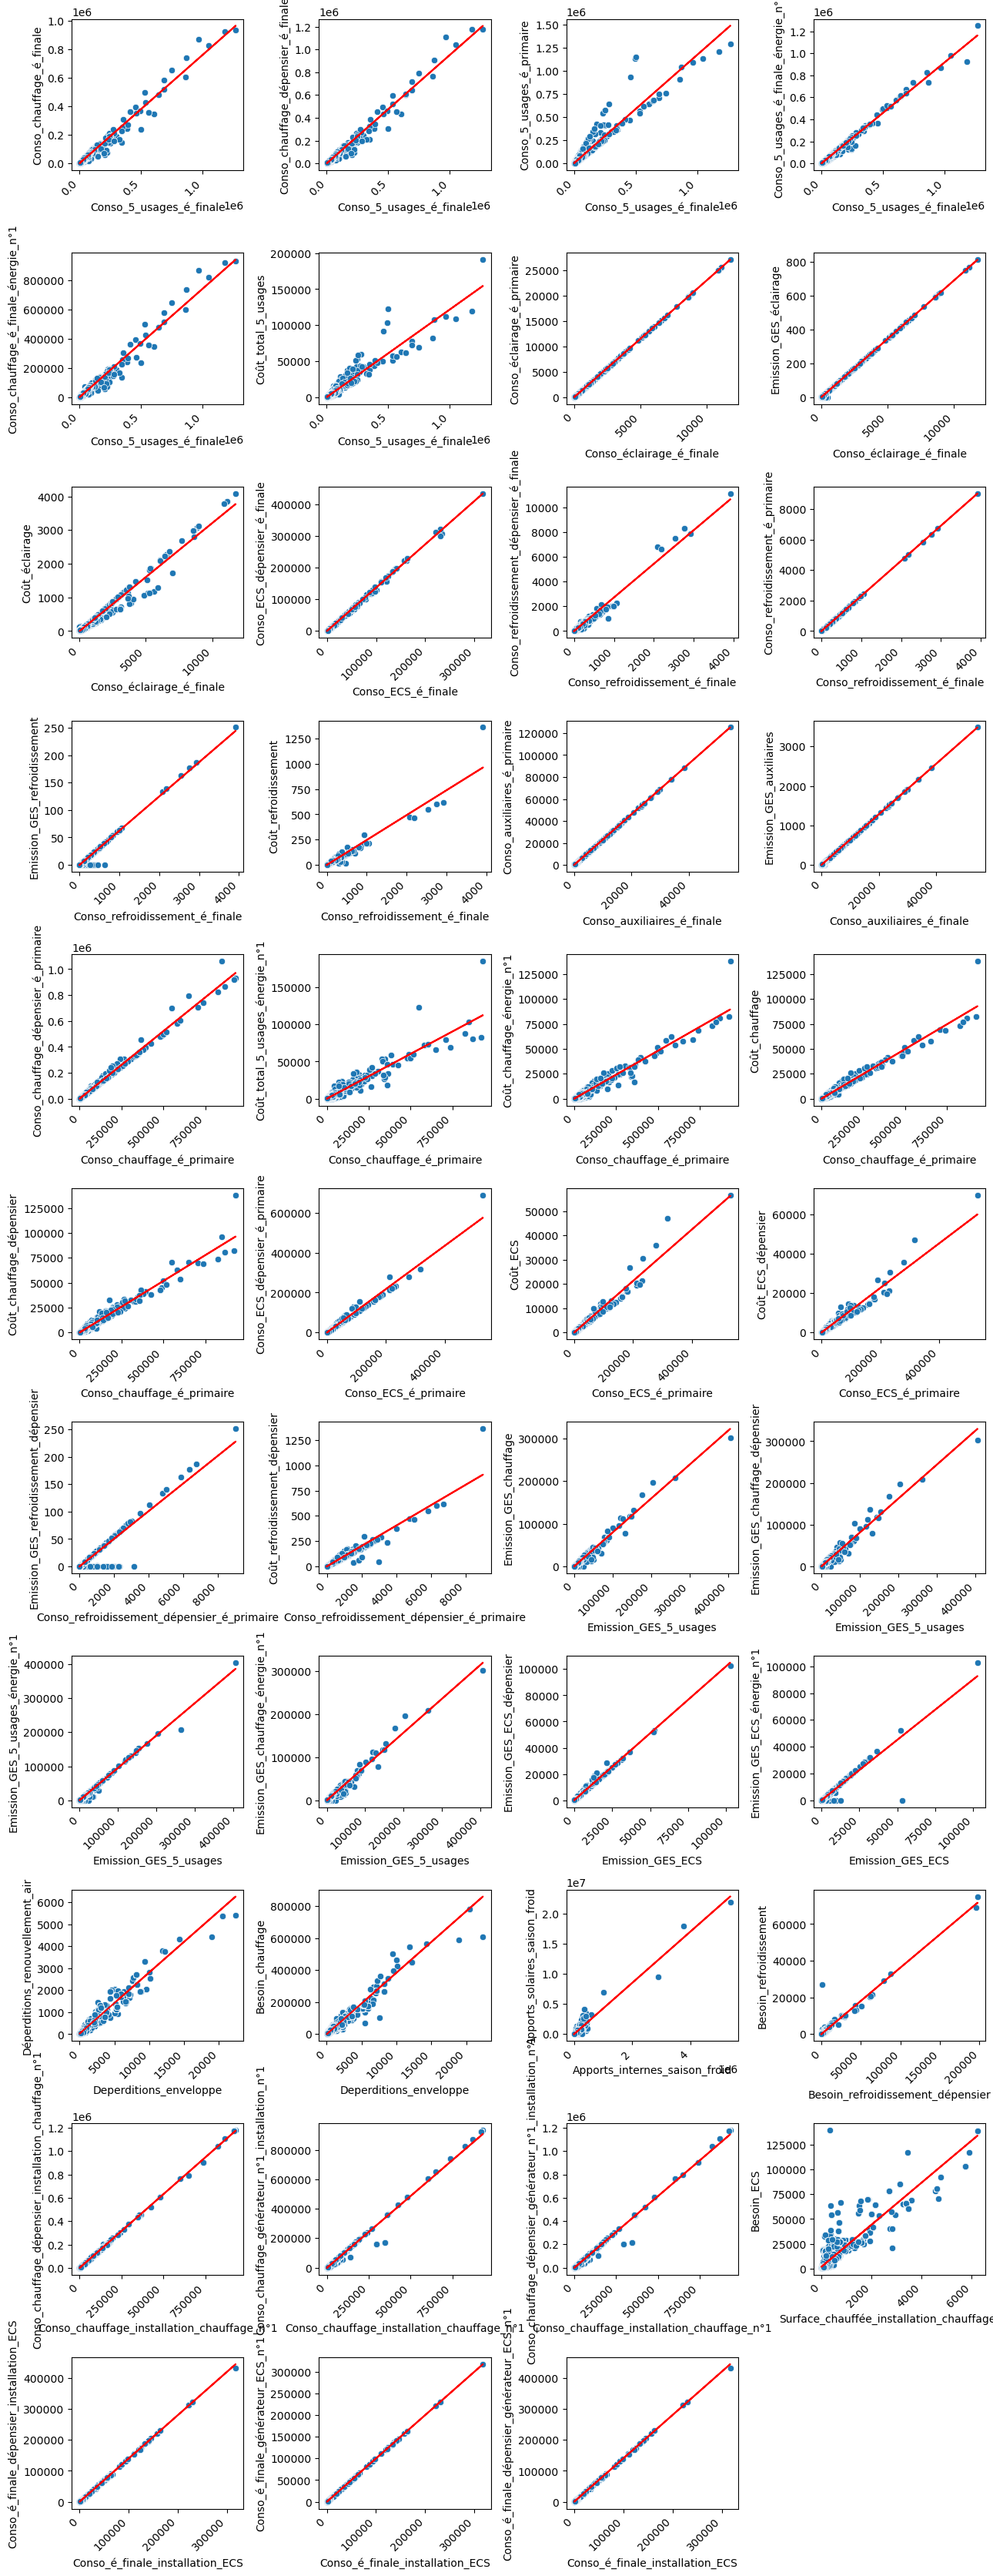

In [57]:
nb_line = (len(df_quanti_col) + 3) // 4


plt.figure(figsize=(13, 3 * nb_line))

for i, row in df_lin_regression.iterrows():
    ypred = [row['a'] + row['b']*x for x  in df_quanti[row['x']].values]
    plt.subplot(nb_line, 4, i + 1)  # Créer un subplot
    sns.scatterplot(data=df_quanti, x=row['x'], y = row['y'])
    plt.plot(df_quanti[row['x']].values, ypred, 'r-')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()


Comme prévu, avec le seuil de 90 %, nous avons identifié plusieurs variables présentant une forte corrélation entre elles. Cela confirme la présence de redondance dans notre jeu de données. \
Nous allons maintenant poursuivre l’analyse en réalisant une ACP selon deux approches : la première en conservant toutes les variables, et la seconde après avoir supprimé les variables fortement corrélées. Ensuite, à partir des données projetées dans ces deux espaces, nous entraînerons un modèle de classification dans le but de prédire l’étiquette DPE (Diagnostic de Performance Énergétique). Cela nous permettra d’évaluer l’impact de la réduction de redondance sur la performance du modèle.

## ACP

Nous allons maintenant effectuer une Analyse en Composantes Principales (ACP) afin de réduire la dimensionnalité de nos données tout en conservant un maximum d'information. \
L’ACP se déroule en plusieurs étapes : 
* d’abord, les données sont centrées et réduites
* ensuite, on calcule la matrice de corrélation
* puis, on détermine les valeurs propres et les vecteurs propres de cette matrice. Ces vecteurs propres constituent une nouvelle base dans laquelle les données sont projetées
* enfin évaluer la qualité de représentation de nos individus, de leur contribution et également de la corrélation entre nos variables et nos nouveaux axes

In [58]:
# ------------------------------------------------------ ACP sans prendre en compte la regression lineaire, on utilise toutes les variables -------------------------------------------------------------------
# recuperation des données
X1 = df_quanti.values

X1_cr, corr1, val_p1, vec_p1, inertie1, X1_proj = acp(X1)

# ------------------------------------------------------ ACP qui prendre en compte la regression lineaire, on utilise juste les variables avec un R² < 90% -------------------------------------------------------------------
# recuperation des données
X2 = df_quanti[df_quanti_col].values

X2_cr, corr2, val_p2, vec_p2, inertie2, X2_proj = acp(X2)

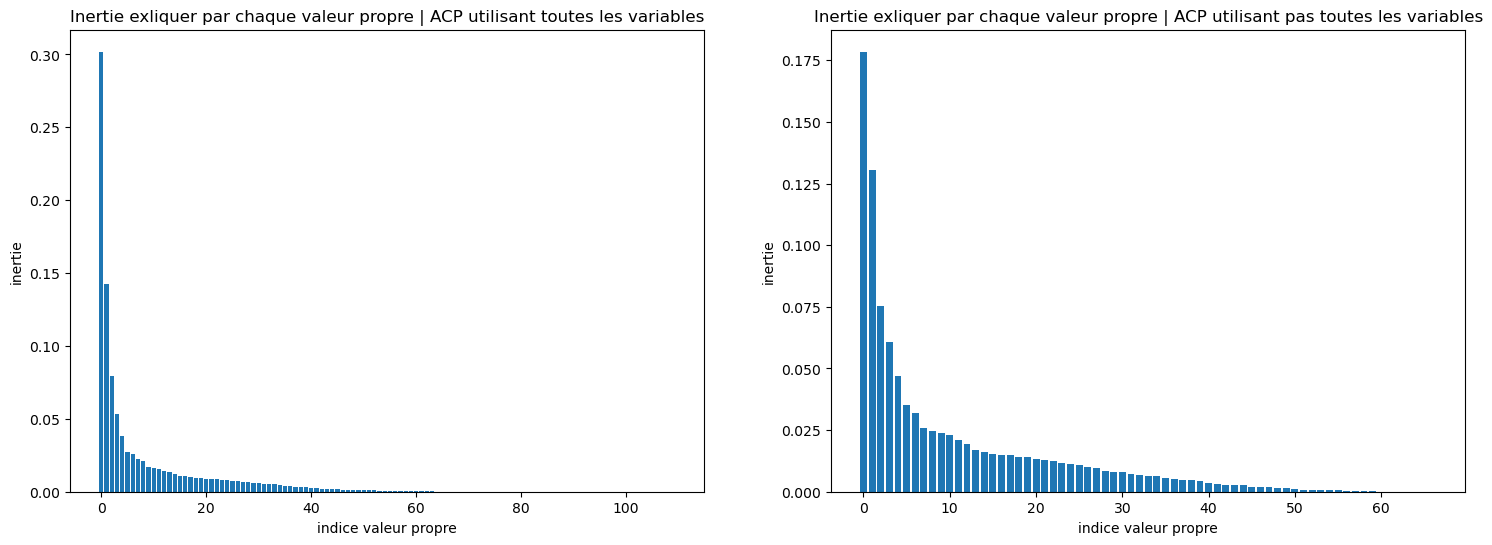

In [59]:
# afichge iinertie expliquer 
plt.figure(figsize=(18,6))

# ACP 1
plt.subplot(121)
plt.bar(x = range(len(val_p1)), height=inertie1)
plt.title("Inertie exliquer par chaque valeur propre | ACP utilisant toutes les variables")
plt.xlabel("indice valeur propre")
plt.ylabel("inertie")

# ACP 2
plt.subplot(122)
plt.bar(x = range(len(val_p2)), height=inertie2)
plt.title("Inertie exliquer par chaque valeur propre | ACP utilisant pas toutes les variables")
plt.xlabel("indice valeur propre")
plt.ylabel("inertie")

plt.show()

**1.ACP réalisée en utilisant toutes les variables.** \
On observe que la première composante principale explique à elle seule plus de 30 % de la variance, suivie d’une deuxième composante qui en explique environ 15 %. Ensuite, les inerties décroissent rapidement. Cela signifie que la majorité de l'information peut être capturée par un petit nombre de composantes

**2.ACP réalisée sans les variables fortement corrélées.** \
Ici, bien que la première composante explique moins de variance (environ 18 %) et la seconde au tours de 13%, il semble donc que l’étape de régression linéaire et la suppression des variables fortement corrélées aient entraîné une perte de variabilité. Car, excepter la première composante principale dont l’inertie a brusquement chuté, les autres composantes conservent des valeurs proches de celles obtenues lors de l’ACP initiale. Cela suggère donc que la suppression de certaines variables nous a juste fait perde de l'information. Cependant, dans les deux cas, on remarque qu’à partir de la composante 60, les composantes principales n’expliquent pratiquement plus rien de la variance. Leur inertie devient très faible

Nous allons maintenant tracer l'inertie cumulée pour voir à partir de combien on capte 90% de la variabilité

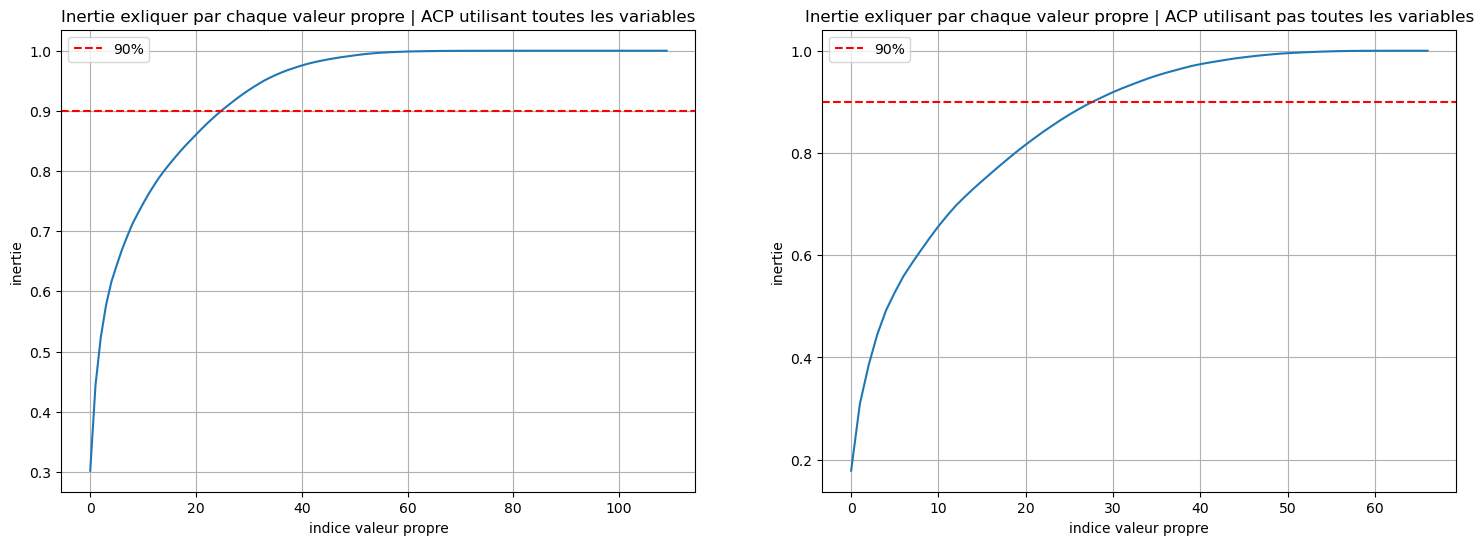

Nombre de variable necessaire a ACP 1 pour expliqué 90% de variabilité est : 25
Nombre de variable necessaire a ACP 2 pour expliqué 90% de variabilité est : 28


In [60]:
plt.figure(figsize=(18,6))

# ACP 1
plt.subplot(121)
plt.plot(range(len(val_p1)), inertie1.cumsum())
plt.axhline(0.9, color='red', linestyle='--', label='90%')
plt.grid()
plt.title("Inertie exliquer par chaque valeur propre | ACP utilisant toutes les variables")
plt.xlabel("indice valeur propre")
plt.ylabel("inertie")
plt.legend()

# ACP 2
plt.subplot(122)
plt.plot(range(len(val_p2)), inertie2.cumsum())
plt.axhline(0.9, color='red', linestyle='--', label='90%')
plt.grid()
plt.title("Inertie exliquer par chaque valeur propre | ACP utilisant pas toutes les variables")
plt.xlabel("indice valeur propre")
plt.ylabel("inertie")
plt.legend()

plt.show()

print("Nombre de variable necessaire a ACP 1 pour expliqué 90% de variabilité est :", (inertie1.cumsum() <0.9).sum())
print("Nombre de variable necessaire a ACP 2 pour expliqué 90% de variabilité est :", (inertie2.cumsum() <0.9).sum())

Le graphique de ACP utilisant toutes les variables, montre qu'il faut 25 composantes pour expliquer 90% de la variance, il a une croissace très rapide, tandis que l'autre, en nécessite 28. Cela indique que l'utilisation de toutes les variables permet une réduction de dimension plus efficace. Dans les deux cas, l'inertie augmente rapidement avec les premières composantes avant de se stabiliser, mais l'utilisation de toutes les variables permet d'atteindre le seuil de 90% plus rapidement.

Nous allons maintenant affiner nos données projetées sur les deux premières composantes principales, puis évaluer la qualité de la représentation de nos individus

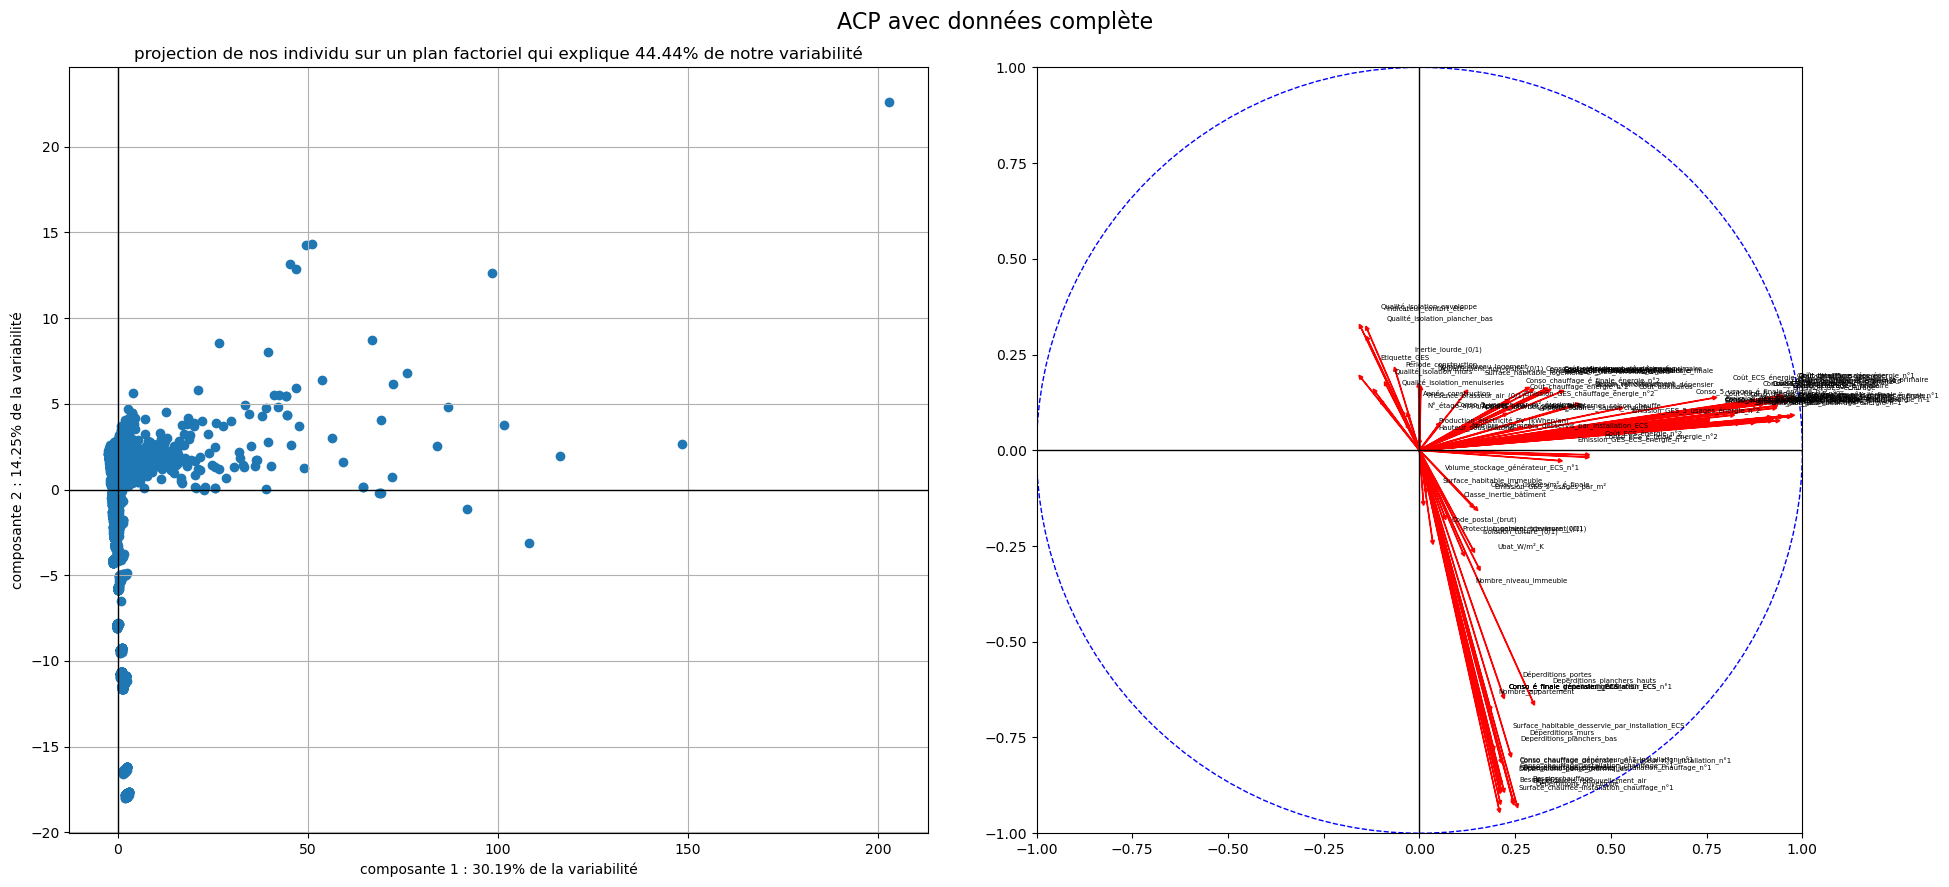

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(20, 9))
fig.suptitle("ACP avec données complète", fontsize=16)

plot_plan_fact(X1_proj, inertie1, ax = axs[0])
cercle_corr(val_p1, vec_p1, df_quanti.columns, df_quanti.columns, ax = axs[1])
               
plt.tight_layout()
plt.show()

Nous observons sur le nuage de point que la grande majorité des individus sont regroupés autour de l'origine du plan factoriel. Cela suggère que ces individus présentent des caractéristiques similaires et relativement moyennes par rapport aux variables d'origine. Mais, il y a également pas mal d'individus et également présent le long de l'axe y (du coté négatif). 
<!-- Ces individus se distinguent par des valeurs faibles ou négatives pour la variable représentée par l'axe y. -->

Dispersion plus éloignée : Les autres individus sont dispersés plus loin de l'origine, ces individus présentent des caractéristiques plus distinctes et s'écartent davantage de la moyenne générale, Ce sont peut-être les données aberrantes qui étaient présentes dans notre dataset.

Ce cercle de corrélation, créer a partir ACP avec les données complète, nous montre les relations entre les variables d'origine et les deux premières composantes principales (CP1 et CP2)

Meme si il y'a des variable un peu dans tous les sens, nous remarquons clairement deux groupes de variables distincts :

Un premier groupe qui impacte fortement la formation de l'axe 1 (CP1). Ces variables ont des vecteurs de norme proche de 1 et forment un angle très faible avec l'axe x, ce qui correspond donc à une corrélation positive forte avec CP1. Elles contribuent de manière significative à la variance expliquée par cette première composante principale.


Un second groupe qui impacte fortement la formation de l'axe 2 (CP2). Ces variables ont des vecteurs de norme proche de 1 et forment un angle très faible avec l'axe y, ce qui correspond donc à une forte corrélation negative avec CP2. Elles contribuent de manière significative à la variance expliquée par cette composante principale.

On peut donc donner du sens à nos composantes principales grâce à ces deux groupes de variables et comprendre la différence avec nos individus mais on voit également que nos variables sont bien représentées

In [62]:
# x = corr_vec_p_var(vec_p1, val_p1)[:, 0:2]
# groupe1_1 = np.where(x[:, 0] > 0.5)
# groupe2_1 = np.where(x[:, 1] < -0.5)

# print("les variables du groupe 1 sont : ", df_clean.columns[groupe1_1])
# print("les variables du groupe 2 sont : ", df_clean.columns[groupe2_1])

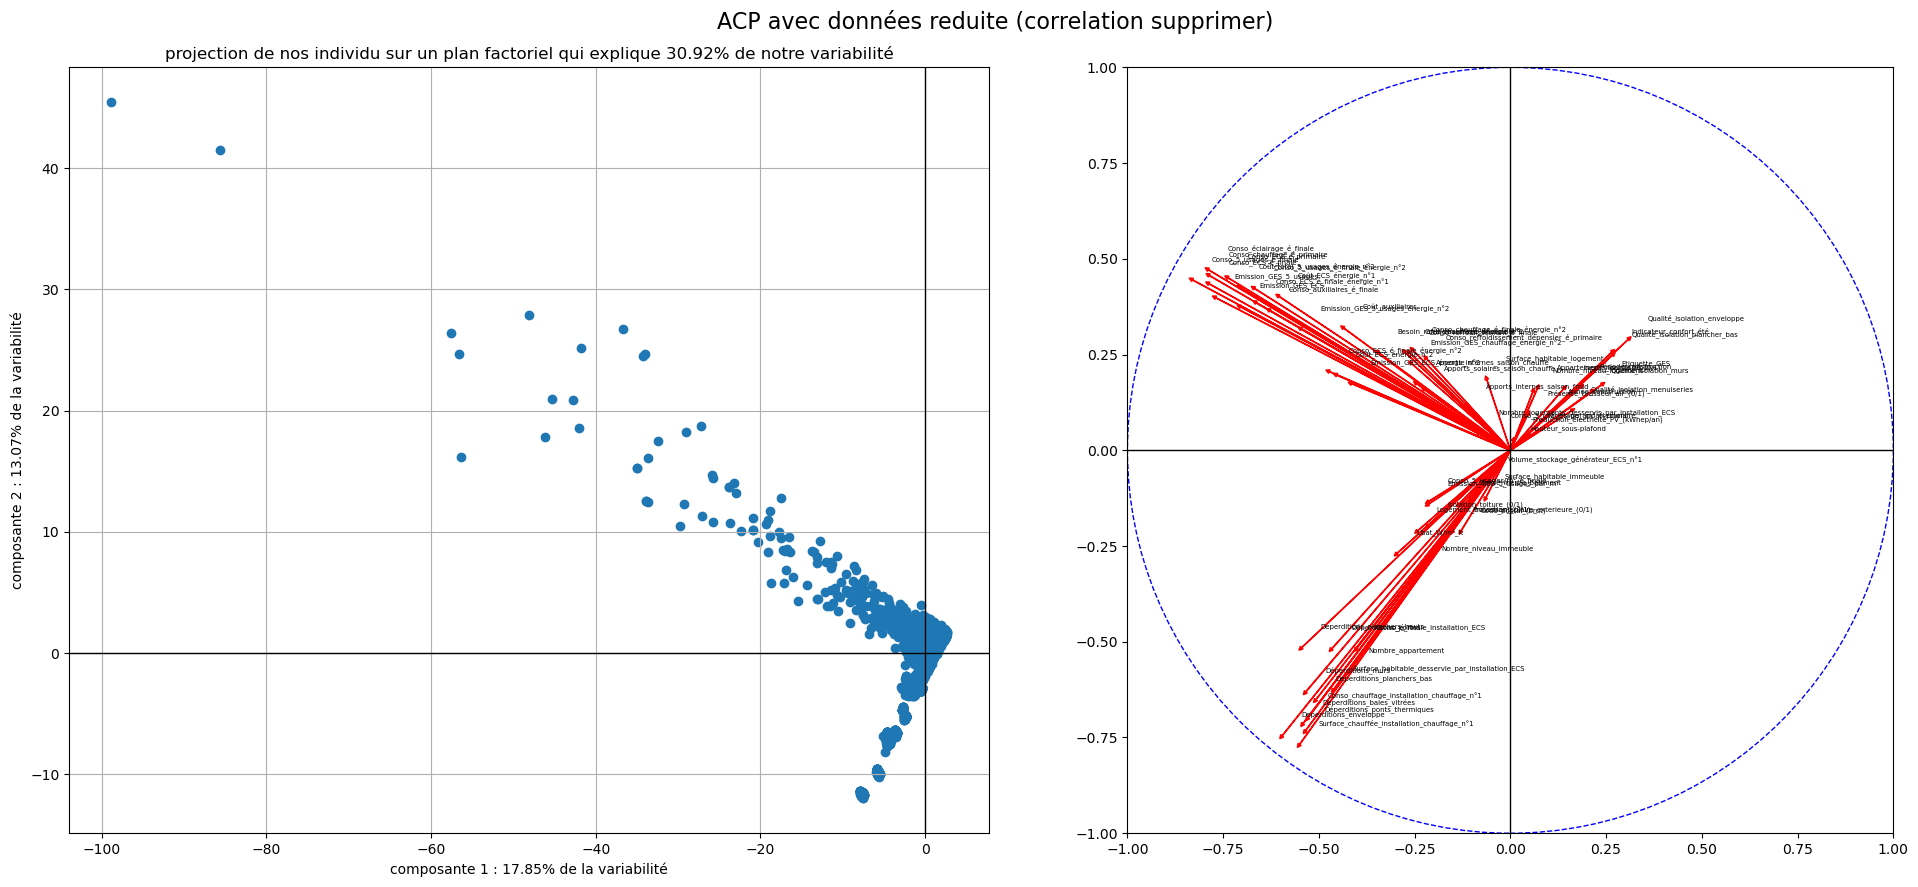

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(20, 9))
fig.suptitle("ACP avec données reduite (correlation supprimer)", fontsize=16)

plot_plan_fact(X2_proj, inertie2, ax = axs[0])
cercle_corr(val_p2, vec_p2, df_quanti[df_quanti_col].columns, df_quanti[df_quanti_col].columns, ax = axs[1])
               
plt.tight_layout()
plt.show()

Sur le nuage de point, on observe une concentration massive d'individus regroupés autour de l'origine (comme sur le graphique précedant), suggérant une forte similarité entre eux mais egalement proche de la moyenne. Enfin, quelques individus isolés se trouvent dans la partie supérieure gauche du graphique, indiquant des caractéristiques distinctes ou des valeurs aberrantes.

Sur le cercle de correlation de cette ACP, on détecte aussi clairement deux groupes de variables qui se distinguent. elles on une norme très prochede 1, ce qui indique qu'elles sont bien représentées dans notre plan factoriel, mais qui sont relativement éloignés des axes factoriels, indiquant une  corrélation moyenne avec les composantes principales. Mais aussi il 'a pas mal de variable qui on une petite norme, Celles-ci ne sont pas très bien représentées, et il en a un peu plus par rapport à l'ACP1.

Ces groupes forment un angle d'environ  40 degrés avec les axes, ce qui signifie qu'ils influencent à la fois la première et la deuxième composante principale, sans que l'on puisse déterminer précisément quelle composante est la plus affectée. Pour le groupe 1 (orienté vers le coin supérieur gauche), on peut dire qu'il impacte plus l'axe 1, alors que pour le second il est très difficile de se prononcer

Cette configurationpeut être due à la régression qui a réparti environ 15% de la variance de la composante 1 (sans régression) dans les autres composantes, ce qui aura eu pour effet de les décaler.

Maintenant nous allons observer la qualité de la représentation des individus sur les axes factoriels

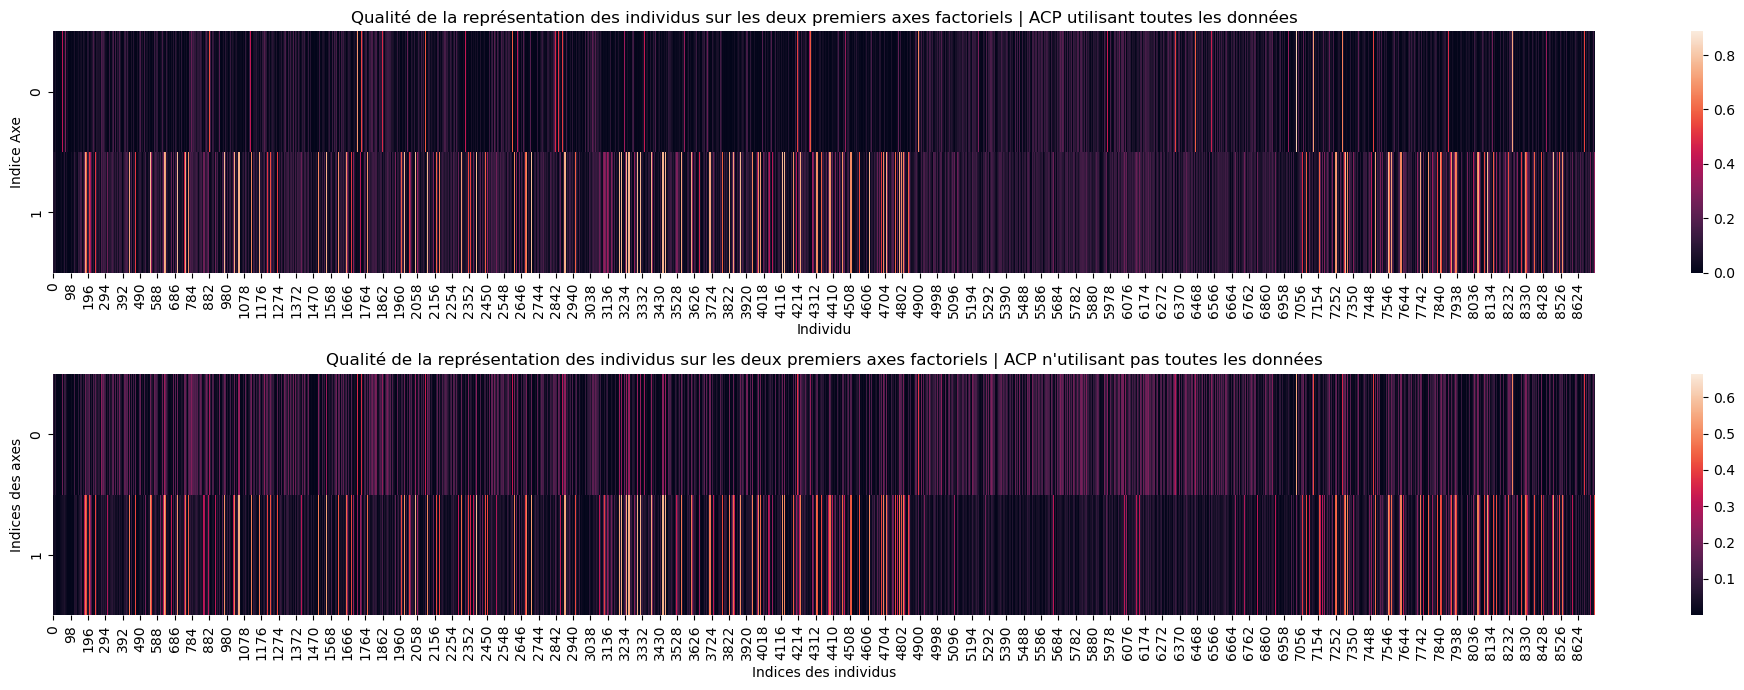

In [64]:
qualite1 = qualite_representation(X1_proj)[:, :2].T
qualite2 = qualite_representation(X2_proj)[:, :2].T

plt.figure(figsize=(20, 7))

plt.subplot(211)
sns.heatmap(qualite1)
plt.title("Qualité de la représentation des individus sur les deux premiers axes factoriels | ACP utilisant toutes les données")
plt.xlabel("Individu")
plt.ylabel("Indice Axe")


plt.subplot(212)
sns.heatmap(qualite2)
plt.title("Qualité de la représentation des individus sur les deux premiers axes factoriels | ACP n'utilisant pas toutes les données")
plt.xlabel("Indices des individus")
plt.ylabel("Indices des axes")

plt.tight_layout()
plt.show()

On observe que les deux graphiques se ressemblent globalement en termes de structure : dans les deux cas, la qualité de la représentation des individus sur les deux premiers axes factoriels est très variable selon les individus. Cependant, une différence notable réside dans l’échelle de couleur utilisée. En effet, dans le premier graphique (en haut), l’échelle de couleur monte jusqu’à 0.8, tandis que dans le second graphique (en bas), elle atteint seulement 0.6. Cela indique que les individus sont globalement mieux représentés dans l’ACP utilisant toutes les données.

Néanmoins, il est également important de noter que, dans les deux cas, l’axe 1 (indice de ligne 0) représente très mal les individus : la majorité des valeurs sont proches de 0, ce qui signifie une mauvaise qualité de projection sur ce premier axe. Cela est surprenant dans le cas de l'ACP utilisant toutes les données car le premier axe englobait environ 30% de la variabilité à lui seul.
L’essentiel de l’information semble donc être porté par le second axe (indice 1), bien que la qualité de représentation reste pour une grande partie des individus.

AU final, même si l’ACP utilisant toutes les données permet une meilleure représentation des individus, la qualité reste relativement limitée, surtout sur le premier axe.

Nous allons maintenant nous intéresser à la contribution des individus à la formation du plan factoriel

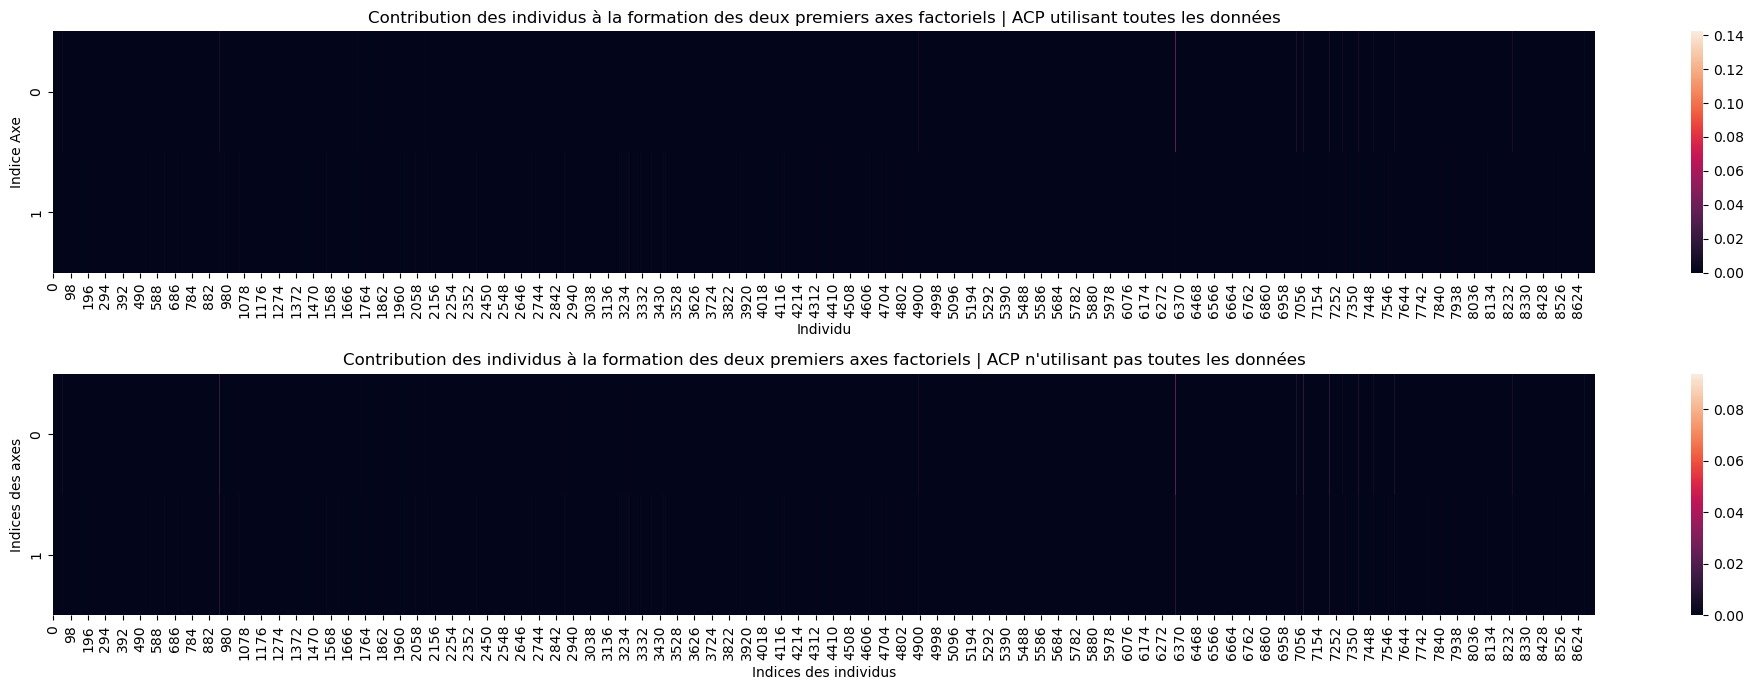

In [65]:
contrib1 = contribution_individu(X1_proj, val_p1)[:, :2].T
contrib2 = contribution_individu(X2_proj, val_p2)[:, :2].T

plt.figure(figsize=(20, 7))

plt.subplot(211)
sns.heatmap(contrib1)
plt.title("Contribution des individus à la formation des deux premiers axes factoriels | ACP utilisant toutes les données")
plt.xlabel("Individu")
plt.ylabel("Indice Axe")


plt.subplot(212)
sns.heatmap(contrib2)
plt.title("Contribution des individus à la formation des deux premiers axes factoriels | ACP n'utilisant pas toutes les données")
plt.xlabel("Indices des individus")
plt.ylabel("Indices des axes")

plt.tight_layout()
plt.show()

On constate encore une fois que les deux graphiques se ressemblent globalement. 

Dans les deux cas, on remarque que la grande majorité des individus ont une contribution extrêmement faible, proche de zéro, ce qui se traduit par la dominance de la couleur très sombre sur l’ensemble des graphiques. Cela indique que les individus contribuent de manière relativement équivalente à la formation des deux premiers axes, sans qu’aucun ne se distingue particulièrement.


**Bilan ACP**

Dans cette section, nous avons réalisé deux analyses en composante principale, l'une sur les données complètes nettoyées et l'autre sur les données où nous avions supprimé les corrélations qui ont un coefficient de détermination (R²) supérieur à 90%.

nous constatons  :
* Il faut 28 composantes principales à la deuxième ACP pour expliquer 90% de la variabilité, alors qu'il n'en faut que 25 à la première pour le même seuil. De plus, la juste avec les deux premières composantes, ACP1 explique environ 45% de la variabilité alors que ACP2 explique environ 33%. Sur ce point, on peut dire que ACP1 est meilleur
* Au niveau des cercles de corrélation, avec ACP1, nous observons principalement deux groupes de variables, l'un très corrélé (positivement) avec la composante principale 1, l'autre très corrélé (négativement) avec la composante principale 2. Aussi, nous voyons que nos variables ont une norme proche de 1, ce qui indique qu'elles sont très bien représentées par l'ACP1 et nous permet également de donner plus facilement du sens à nos axes factoriels. Cependant, avec ACP2, nous identifions également deux groupes de variables, mais l'angle qu'il forme avec l'axe des abscisses est environ d'environ 45 degrés, cela rend un peu plus difficile l'interprétation de nos axes factoriels. Nous avons aussi certes beaucoup de variables de norme proche de 1, mais il n’y a pas mal de variables (plus que dans l'ACP1) qui ont une longueur courte, cela signifie que ces variables ne sont pas si bien représentées par cette ACP (ACP2). Ici aussi, on arrive à la conclusion que ACP1 est meilleure car elle représente mieux nos variables.
* Puis au niveau de la qualité de representation, on constate que les deux ACP représentent mal les individus sur le premier axe factoriel (axe 1). Dans les deux cas, la qualité de représentation y est très faible. En revanche, l’ACP1 offre une bien meilleure représentation des individus sur le second axe (axe 1) comparer a l'ACP2


Tous ces éléments montrent que chercher à réduire la dimensionnalité en amont via une régression (ici en supprimant des variables fortement corrélées) n’apporte pas d'amélioration, voire dégrade la qualité de l’ACP. Dans notre cas, cette étape s'avère donc non seulement inutile, mai aussis contre-productive..

# Mise en place du clustering

## Déterminantion du nombre de cluster et mise en place du Kmean

### Clustering

In [66]:
from sklearn.cluster import KMeans

X = X1_proj[:, :26]  # on recupere les 90% de variabilité
X = normalisation(X) # on normalise nos données

centre_nuage_point = np.mean(X, axis=0)
inertie_totale = np.sum(np.linalg.norm(X - centre_nuage_point, axis=1)**2)

# dans cette phase, nous allon srechercher le bon nombre de K
inertie_intra_cluster = [] # somme inertie intra cluster (chaus ecluster)
inertie_inter_cluster = [] # somme distance separation entre les centres et le centre global
for i in range(1, 11): 
    model = KMeans(i)
    model.fit(x)
    inertie_intra_cluster.append(model.inertia_)
    inertie_inter_cluster.append(inertie_totale - model.inertia_)

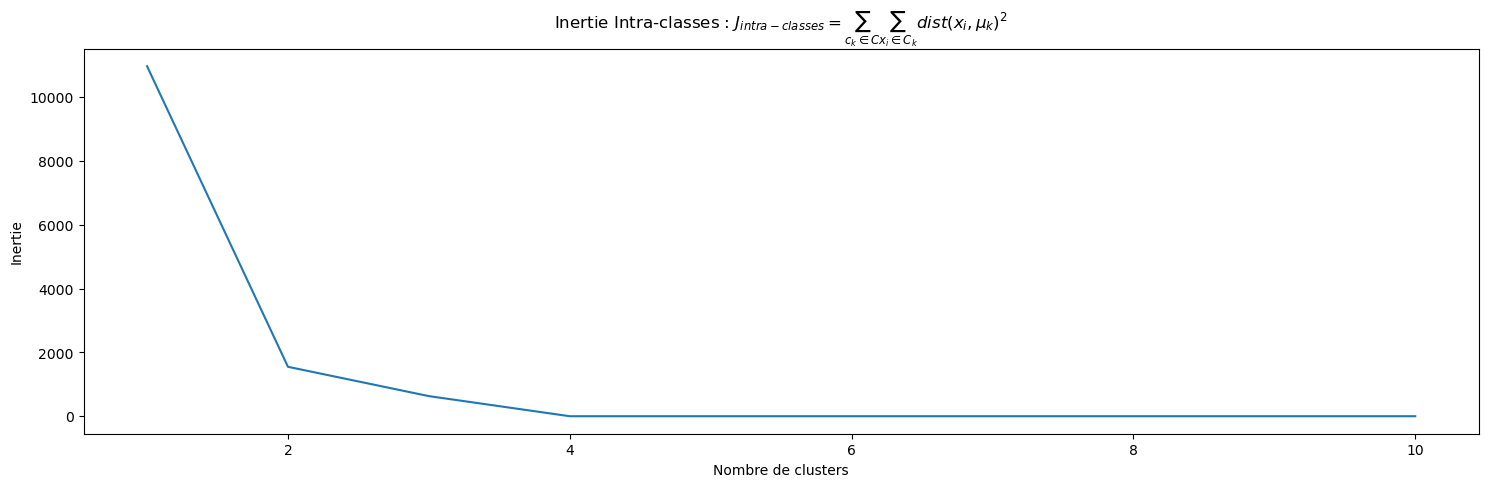

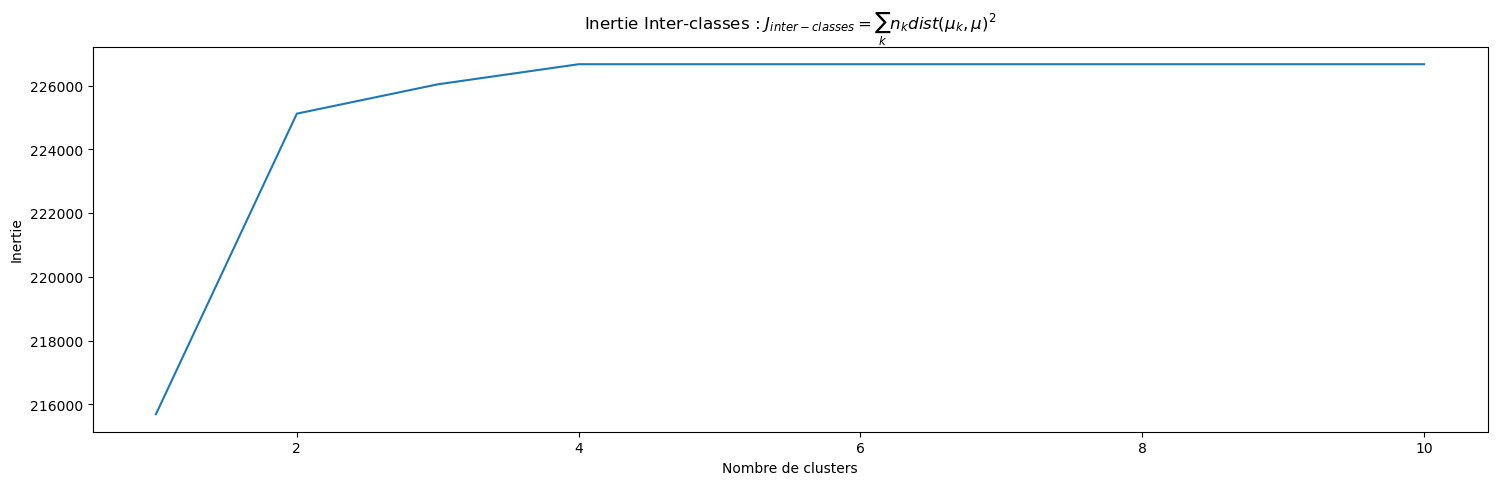

In [67]:
plt.figure(figsize=(18, 5))
plt.plot(range(1, 11), inertie_intra_cluster)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Inertie Intra-classes : $J_{intra-classes} = \sum_{c_k \in C}{\sum_{x_i \in C_k}{dist(x_i, \mu_k)^2}}$")
plt.show()

plt.figure(figsize=(18, 5))
plt.plot(range(1, 11), inertie_inter_cluster)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Inertie Inter-classes : $J_{inter-classes} = \sum_{k}{n_k dist(\mu_k, \mu)^2}$")
plt.show()

Pour rappel, lorsAprès avoir analysé les courbes obtenues à partir de l’évolution de l’inertie intra classes et inter classes en fonction du nombre de clusters, nous observons un changement notable de pente jusqu’à k = 4, au-delà duquel la réduction de l’inertie devient marginale. Ce point marque le début d’un aplatissement de la courbe, indiquant que l’ajout de clusters supplémentaires n’apporte plus de gain significatif en termes de compacité des groupes. Par conséquent, nous retenons 4 comme nombre optimal de clusters.

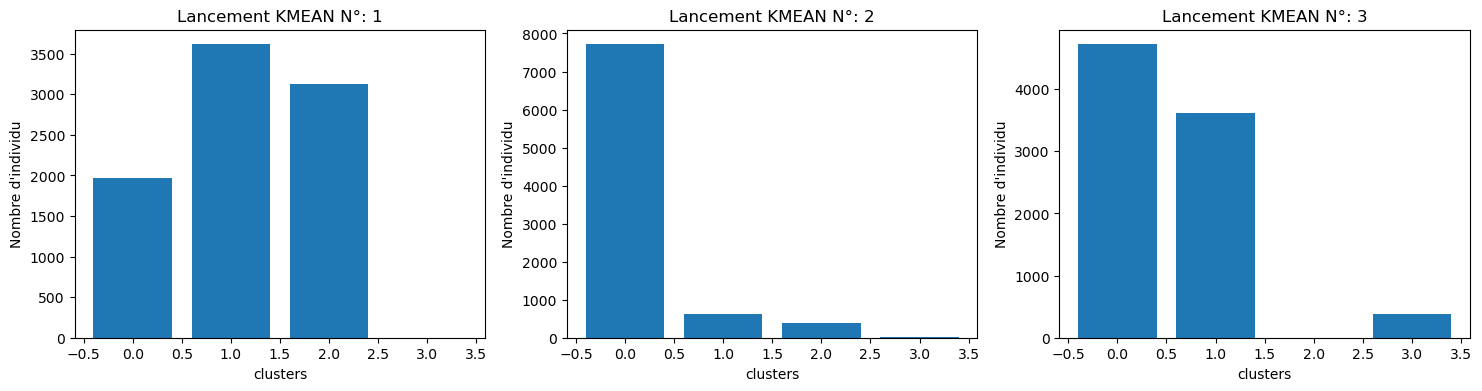

In [73]:
k_model = []
for i in range(3): 
    model = KMeans(4, n_init=10, max_iter=1000)
    model.fit(X)
    k_model.append(np.unique(model.labels_, return_counts=True))

plt.figure(figsize=(18, 4))
for i, val in enumerate(k_model, start=1):
    plt.subplot(1, 3, i)
    plt.bar(x = val[0], height = val[1])
    plt.title("Lancement KMEAN N°: " + str(i))
    plt.xlabel("clusters")
    plt.ylabel("Nombre d'individu")

plt.show()

Notre classification se revèle trop instable, avec des clusters qui varient fortement d’un essai à l’autre. 

Cette instabilité suggère une forte sensibilité aux valeurs extrêmes présentes dans les données. 

Les outliers semblent perturber la structure globale du dataset, rendant difficile une séparation cohérente entre les groupes. 

Pour remédier à ce problème, nous allons chercher à traiter ces outliers de manière appropriée afin de stabiliser notre classification et améliorer la qualité des regroupements obtenus.

### Suppression des outliers

In [69]:
# Initialisation d'une liste pour garder les indices valides
valid_rows = []

# Calcul des quartiles Q1 et Q3
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Définition des bornes (2 IQR au-delà des quartiles)
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Parcours de chaque ligne du dataframe
for idx, row in df_clean.iterrows():
    # Vérification si la ligne contient des outliers
    is_outlier = False
    for col in df_clean.columns:
        if row[col] < lower_bound[col] or row[col] > upper_bound[col]:
            is_outlier = True
            break
    if not is_outlier:
        valid_rows.append(idx)

# Création du dataframe nettoyé avec les lignes valides
df_clean.loc[valid_rows].shape

(584, 111)

nous constatons que cette approche entraîne une perte considérable de données. En effet, en éliminant les lignes contenant des valeurs extrêmes, nous réduisons de manière significative la taille de notre dataset, ce qui peut biaiser les résultats et limiter la représentativité de nos analyses. Cette perte de données peut aussi nuire à la robustesse des modèles, car une quantité importante d’informations est ainsi ignorée. Par conséquent, il devient évident que cette méthode de suppression n’est pas optimale.

Étant donné l’instabilité persistante de notre modèle de classification, principalement due à la forte présence d’outliers dans les données, je decide de ne plus poursuivre l’approche par clustering, notamment avec l’algorithme K-Means. En effet, les résultats obtenus manquent de cohérence et ne permettent pas une interprétation fiable des groupes formés. Plutôt que de tenter de forcer une classification instable ou en faisant des transformation, qui risque de trop biaisé nos données, je fais le choix d’orienter notre démarche vers une approche prédictive. Nous allons ainsi utiliser un modèle de type Random Forest, afin de prédire directement la variable DPE. Ainsi, nous pourrons, en analysant les arbres, identifier les variables  qui ont influencé la formation des DPE et des différents seuils. Et éventuellement voir s'ils ne peuvent pas être regroupés.

# Prediction DPE avec random forest

In [70]:
X = normalisation(X1_proj[:, :26])
y = df_clean['Etiquette_DPE'].values.reshape(-1, 1)


# Séparer en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Création du modèle Random Forest avec 200 arbres
model = RandomForestClassifier(n_estimators=200)

# Entraînement du modèle
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [71]:
# Test du modele
y_pred = model.predict(X_test)

# eavluation du modèle
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Accuracy : 0.7631880733944955

Rapport de classification :
               precision    recall  f1-score   support

           0       0.84      0.70      0.76        73
           1       0.72      0.60      0.66       178
           2       0.74      0.67      0.70       360
           3       0.73      0.85      0.79       574
           4       0.82      0.85      0.84       480
           5       0.79      0.29      0.42        52
           6       0.75      0.67      0.71        27

    accuracy                           0.76      1744
   macro avg       0.77      0.66      0.70      1744
weighted avg       0.76      0.76      0.76      1744



Le modèle Random Forest atteint une accuracy globale de 77.98%, ce qui témoigne d’une performance solide et d’une bonne capacité à généraliser sur l’ensemble des données. 

Cette précision signifie qu’environ 78% des prédictions du modèle sont correctes, ce qui est encourageant compte tenu de la présence d’outliers et de classes déséquilibrées(ex : beaucoup plus de G que de A). 

Lorsqu’on analyse plus en détail le rapport de classification, on observe que les classes les plus représentées (comme les classes 2=E, 3=D et 4=C) sont bien reconnues par le modèle, avec des scores F1 dépassant souvent 0.75. 

La classe 4, notamment, est très bien prédite avec une précision de 92% et un recall de 87%. Or pour les classes moins fréquentes, comme les classes 5(B) et 6(A), bien que la précision reste très élevée, le recall (prédiction des vrai positif) chute fortement (jusqu’à 38% pour la classe 5), ce qui montre que le modèle a du mal à les reconnaître.Cette faiblesse est due au fait que les classes n'ont pas la même distribution. Néanmoins, le résultat global du modèle, mesuré par l’accuracy, reste satisfaisant.

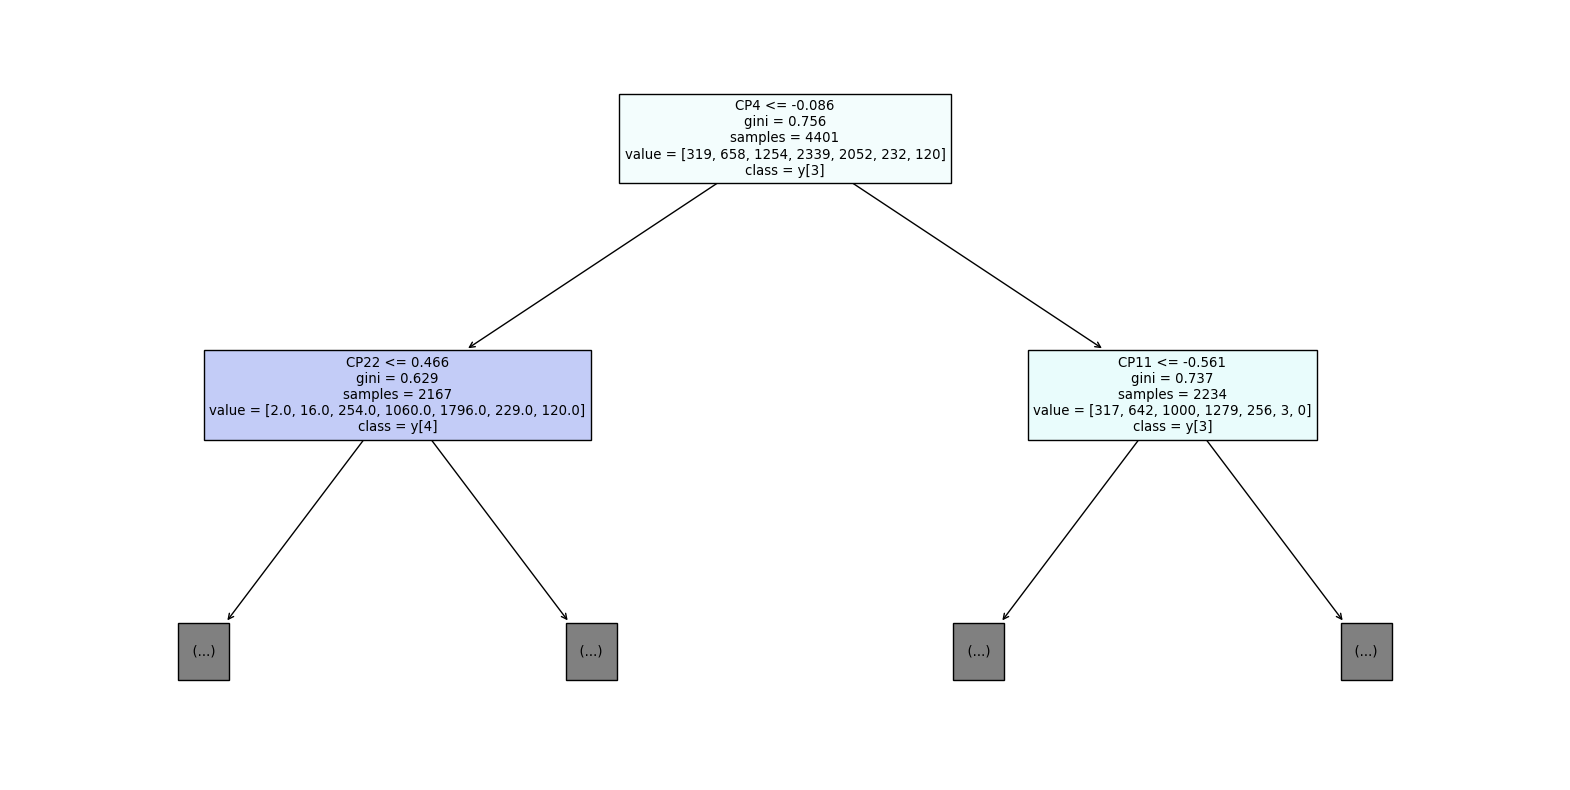

In [72]:
# Affiche le premier arbre 
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], 
          filled=True, 
          feature_names=[f"CP{i}" for i in range(1, 27)], 
          class_names=True, 
          max_depth=1)  # on limite la profondeur pour que ce soit lisible

plt.show()

Ici, on a simplement affiché le premier arbre de notre Random Forest, en se limitant aux deux premiers nœuds. 

Cependant, en explorant cet arbre plus en détail, on peut déjà entrevoir comment les DPE sont structurés. Une analyse approfondie de la logique de décision de certains arbres permettra de mieux comprendre les critères déterminants dans la classification, et peut-être même de voir s'il est possible de regrouper certains DPE selon des profils ou des comportements énergétiques similaires.

# Conclusion

Comme bilan, nous pouvons retenir que :
* **Phase de nettoyage** : Nous avons défini des critères en fonction de nos besoins, ces critères étaient : la suppression des colonnes avec plus de 80% de valeur vide, suppression des colonnes qualitatives non ordinales. Et concernant le remplissage des valeurs manquantes, nous avons opté pour la médiane (pour les données quantitatives) car la moyenne était largement supérieure à la médiane (ce qui suggere la presence de outlier) et le mode pour les données qualitative. Cette phase a pu introduire certaint biais car il y'a des colonnes qui avais extraimement de valeur vide. Puis avons converti les données quanlitative en quantitative pour nos futur analyse. Ainsi au depart, nous avions un dataset de dimensions 8718x242, a la fin de cette etape, nous nous somme retrouver avec un dataset de 8718x111.
* **Phase de régression** : Nous avons effectué une régression linéaire deux à deux, afin de supprimer le maximum de variables corréler avant de commencer à réaliser notre ACP. Nous avons fixé comme seuil R² > 90% (On supprime la variable y de la régression quand on a un R² qui est supérieur au seuil). Grâce à cette étape, nous sommes passés de 111 colonnes à 67 colonnes.
* **Phase ACP** : Nous avons réalisé deux analyses en composantes principales (ACP). La première a été faite sur le dataset complet issu de la phase de nettoyage, et la seconde sur un dataset où les variables fortement corrélées entre elles (R² > 90%) avaient été supprimées. En comparant les deux, nous constatons que la première ACP (ACP1) est globalement plus performante : elle permet d’expliquer 90% de la variabilité avec seulement 25 composantes, contre 28 pour la seconde (ACP2). De plus, ses deux premières composantes expliquent à elles seules environ 45% de la variabilité, alors qu’ACP2 n’en explique que 33% sur les deux premiers axes.
Sur les cercles de corrélation, ACP1 met en évidence deux groupes clairs de variables avec des normes proches de 1, ce qui traduit une bonne représentation de ces variables par les axes factoriels et facilite leur interprétation. En revanche, ACP2 présente davantage de variables avec des longueurs de vecteurs faibles, ce qui signifie qu'elles sont moins bien représentées par cette analyse. Concernant la qualité de représentation des individus, les deux ACP offrent une représentation assez faible sur le premier axe, mais ACP1 se démarque par une meilleure qualité sur le second axe. Ainsi, cette comparaison montre que l’élimination des variables corrélées en amont, censée améliorer l’analyse, s’avère en réalité contre-productive dans notre cas. Elle dégrade la qualité de l’ACP sans apporter de gain significatif en lisibilité ou en performance. Nous retenons donc que la première ACP, réalisée sur l’ensemble des données nettoyées, est la plus pertinente pour notre étude.
* **Phase classification** : Nous avons d'abord exploré une approche de clustering avec l'algorithme K-Means. L'analyse des courbes d'inertie suggérait un optimum à 4 clusters. Toutefois, les résultats se sont révélés très instables, notamment à cause des outliers présents dans les données. Leur suppression a entraîné une perte importante d'informations, rendant cette méthode peu fiable et difficilement interprétable. Face à ces limites, nous avons choisi d’abandonner le clustering au profit d’un modèle prédictif plus robuste : la Random Forest. Ce modèle a atteint une accuracy de 77.98%, avec de très bons résultats sur les classes les plus représentées (C, D, E). Les classes rares (A, B) restent plus difficiles à prédire, en raison du déséquilibre des données. Au-delà des performances, la Random Forest offre une bonne interprétabilité : l’analyse des arbres permet de visualiser les critères influents dans la formation des DPE.

D’un point de vue personnel, j’ai vraiment apprécié ce projet. Il m’a permis d’explorer différentes idées et approches, de tester, comparer, puis ajuster mes choix en fonction des résultats. Au-delà de l’aspect technique, ce projet m’a aussi montré à quel point la qualité des données est importante : elles ne sont pas toujours propres, et il est donc important de bien comprendre leur contexte avant de les nettoyer ou de les exploiter. Cette phase de réflexion en amont est tout aussi importante que la modélisation elle-même, et c’est ce qui rend ce type de projet aussi formateur qu’intéressant.